In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
from MDAnalysis.analysis.rms import RMSD
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Load the topology and trajectory files
u = mda.Universe("myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc")

In [2]:
best_frames = [18271, 18275, 18267, 18447]

In [3]:
best_frames_and_rand = [18271, 18275, 18267, 18447, 27834]

In [4]:
random_frames = [23034, 324, 7893, 32334]

In [8]:
sparse_frames = [
    5857, 5208, 5057, 7462, 6820, 11803, 21103, 21755, 18803, 2800, 
    22532, 9513, 18777, 2791, 6242
]

In [10]:
sparser_frames = [
    5208, 7462, 6820, 11803, 21103, 18803, 2800, 22532, 9513, 2791,
]

# 4 Colour

Aligning frames: 100%|████████████████████████████| 4/4 [00:00<00:00, 14.96it/s]


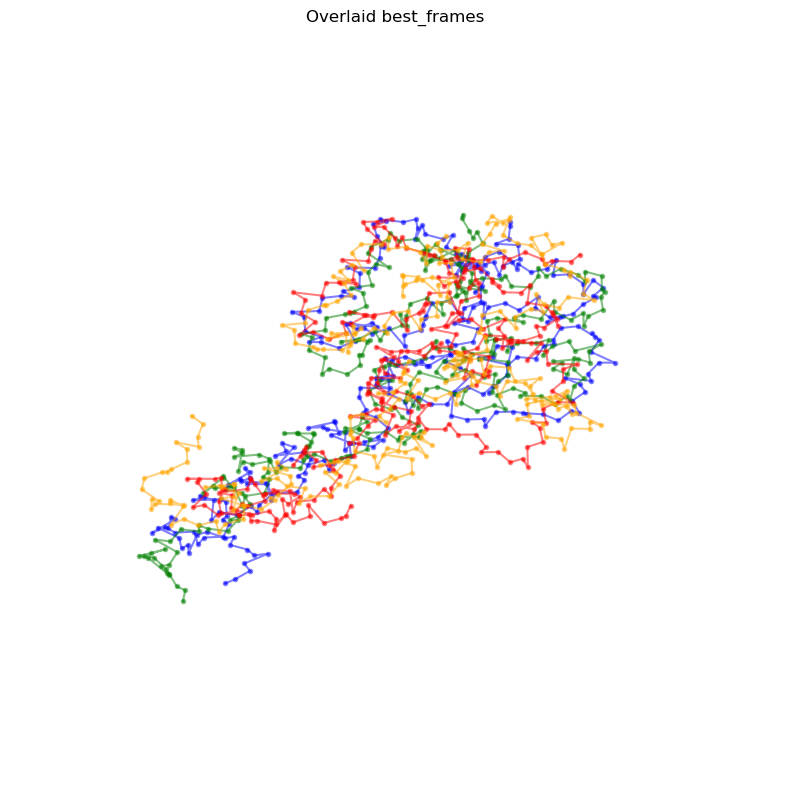

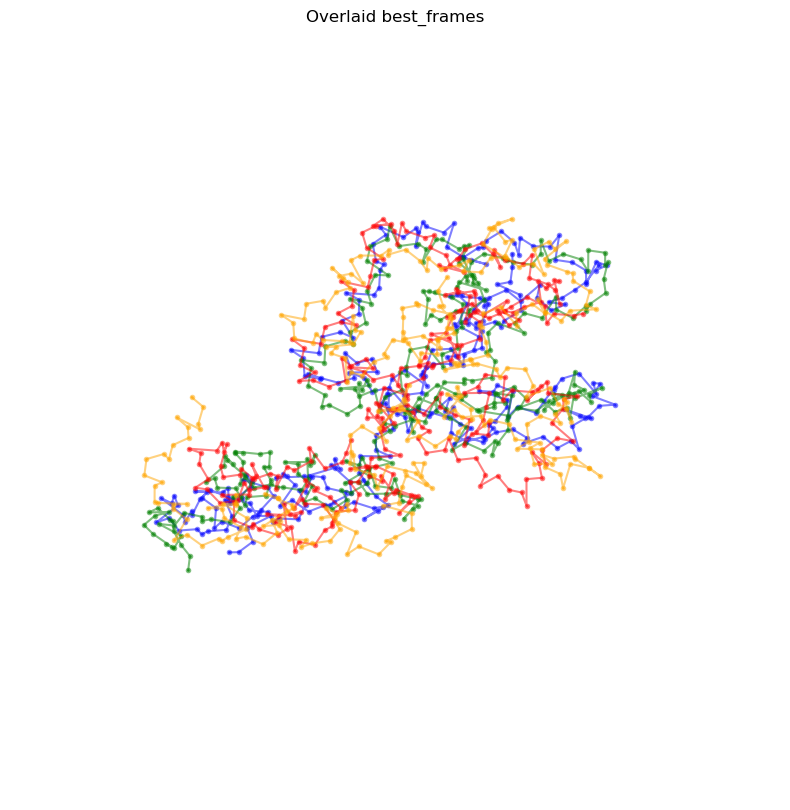

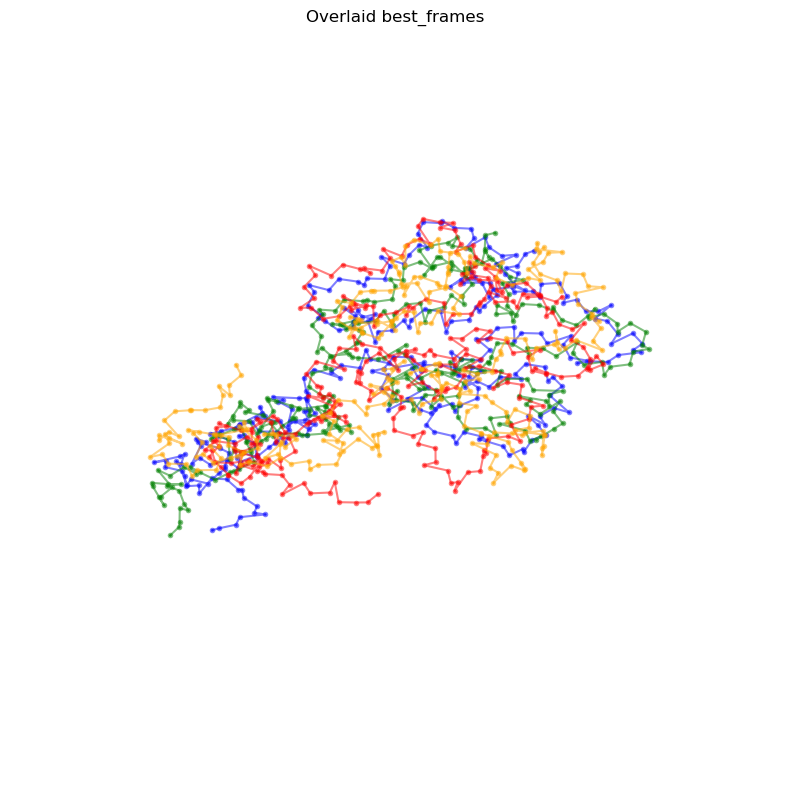

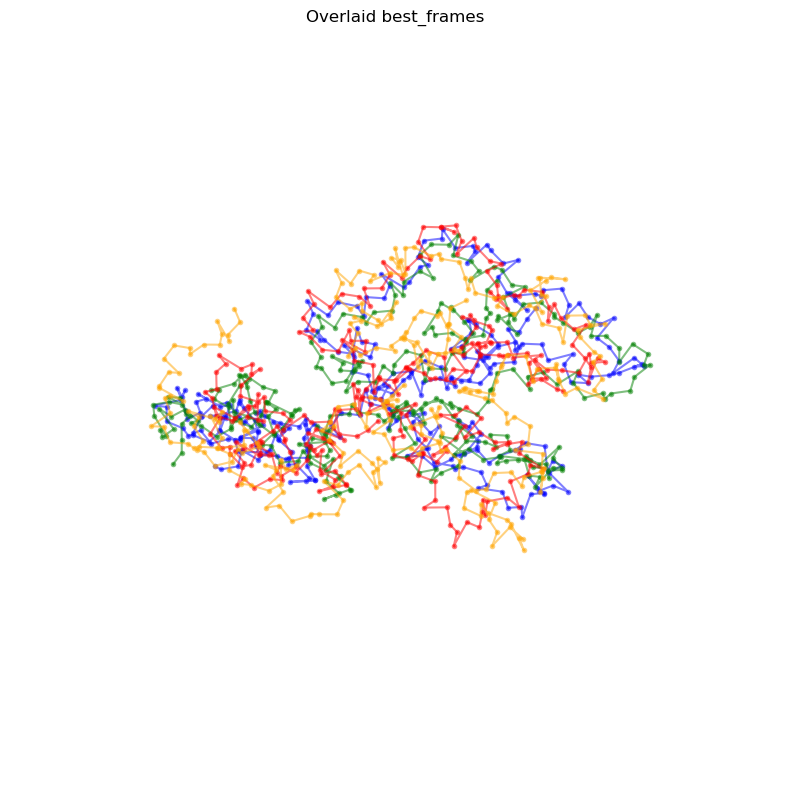

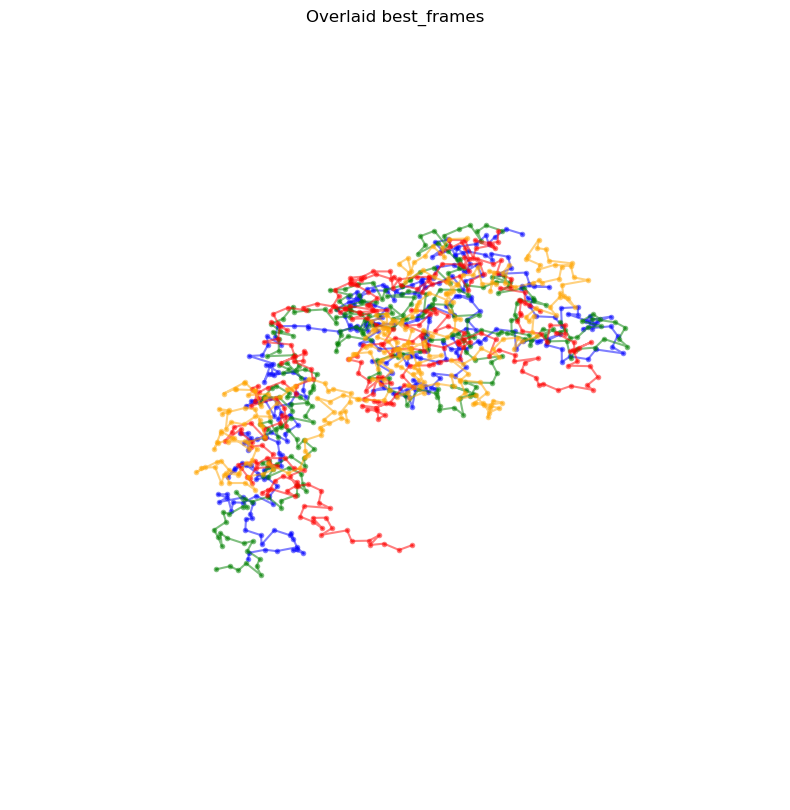

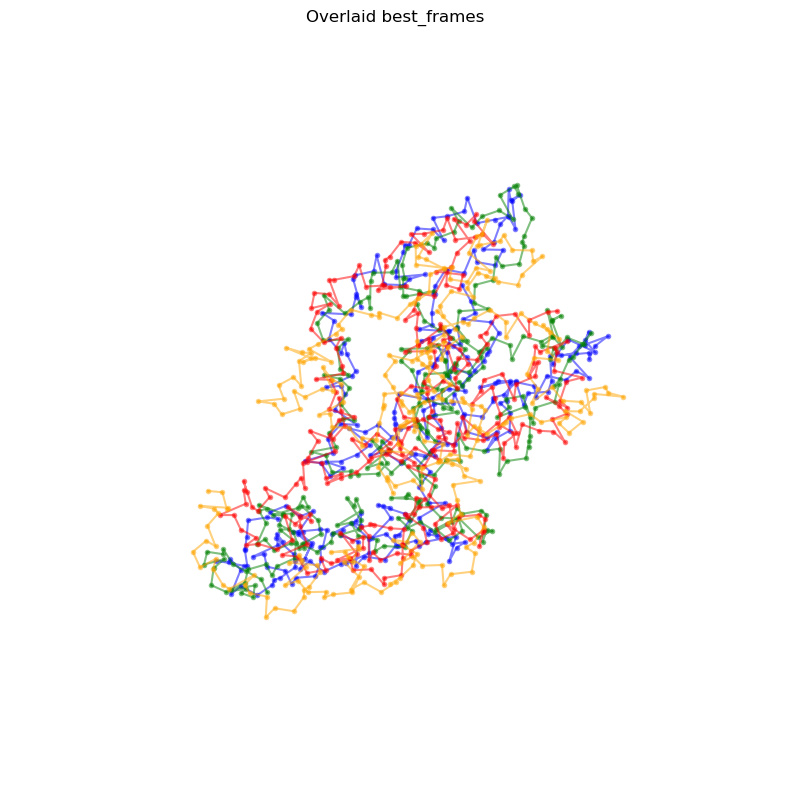

In [22]:
indices = best_frames
title = 'best_frames'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
        opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Overlaid {title}')

    plt.show()

Aligning frames: 100%|████████████████████████████| 5/5 [00:00<00:00, 41.29it/s]


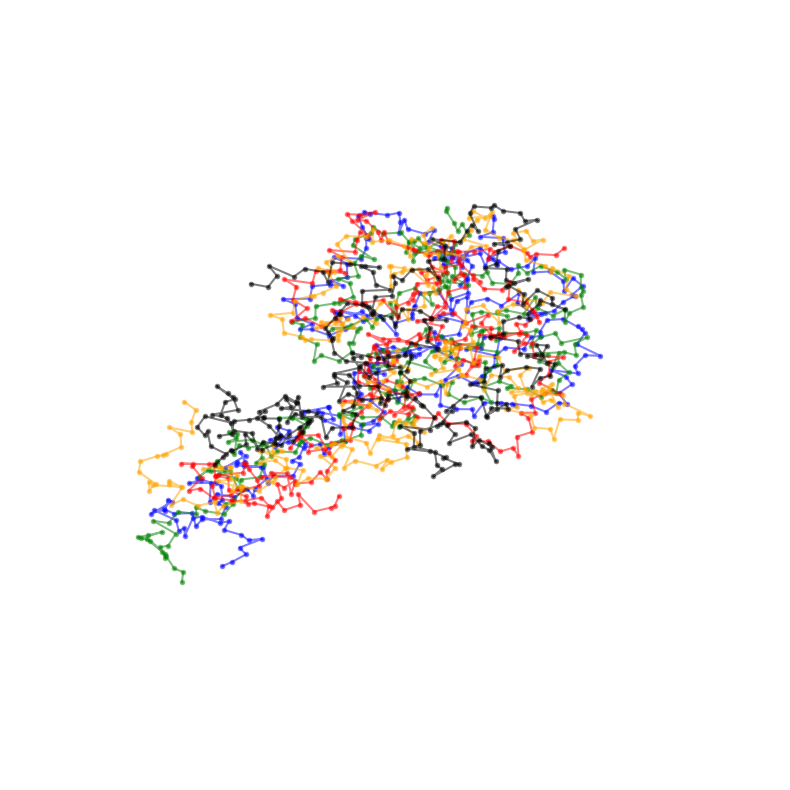

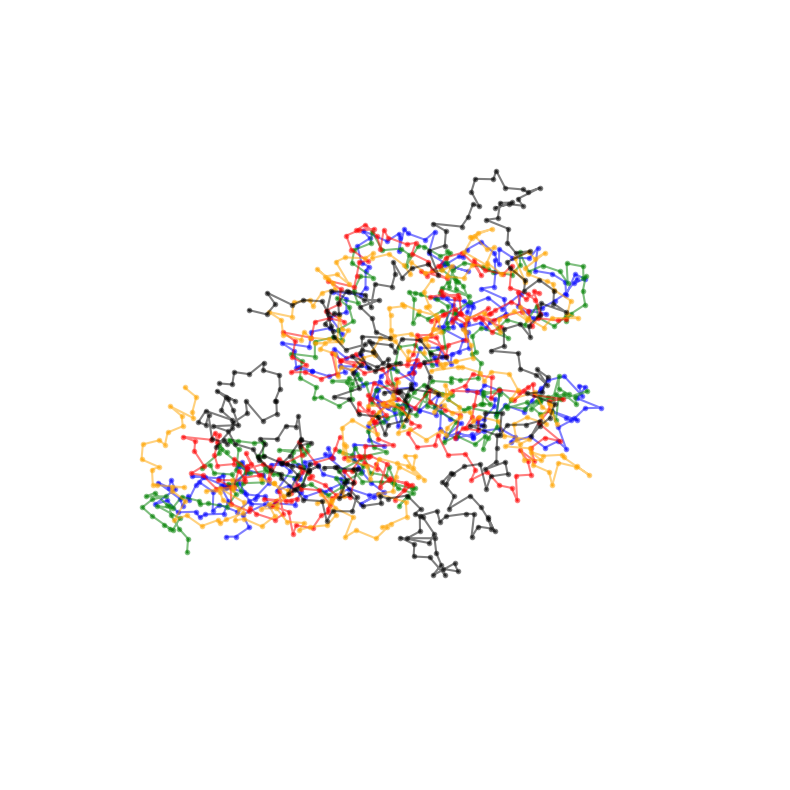

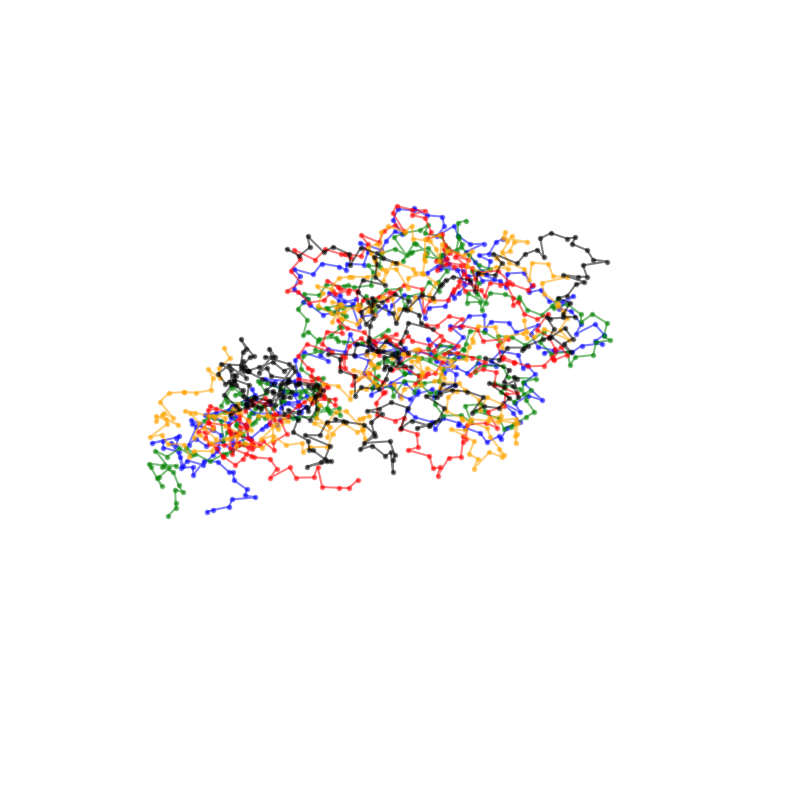

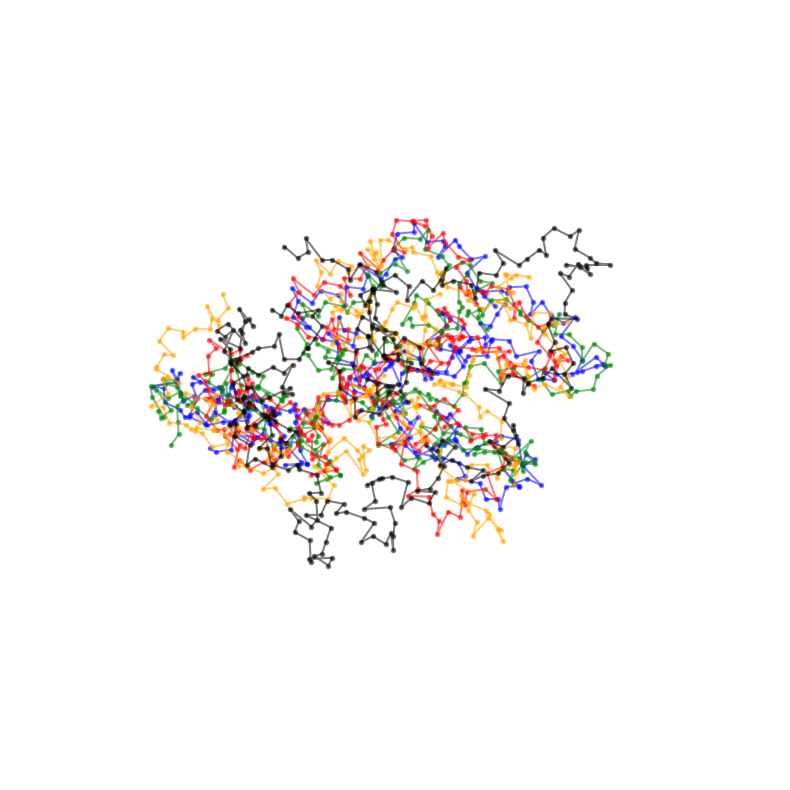

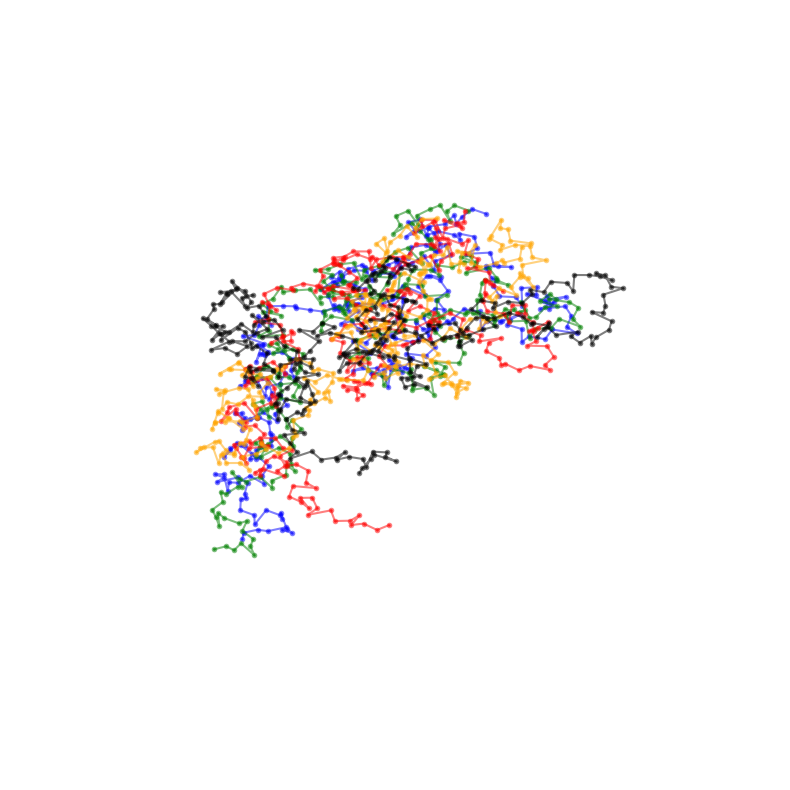

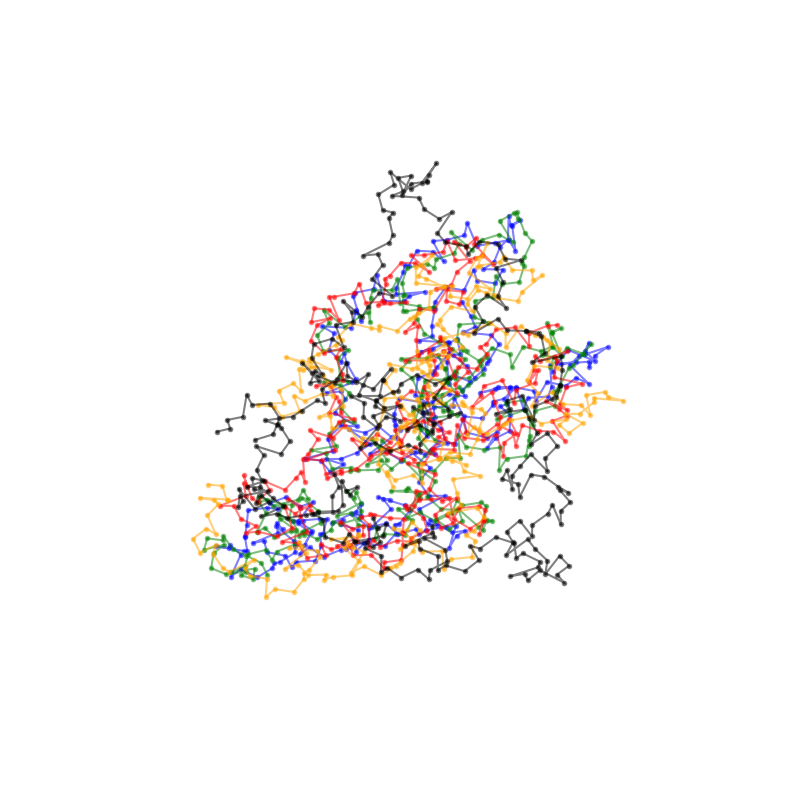

In [6]:
indices = best_frames_and_rand
title = 'best_frames_and_rand'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
        opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  
    ax.grid(False)      
    plt.title(f'Overlaid {title}')
    plt.show()

Aligning frames: 100%|████████████████████████████| 4/4 [00:00<00:00, 39.54it/s]


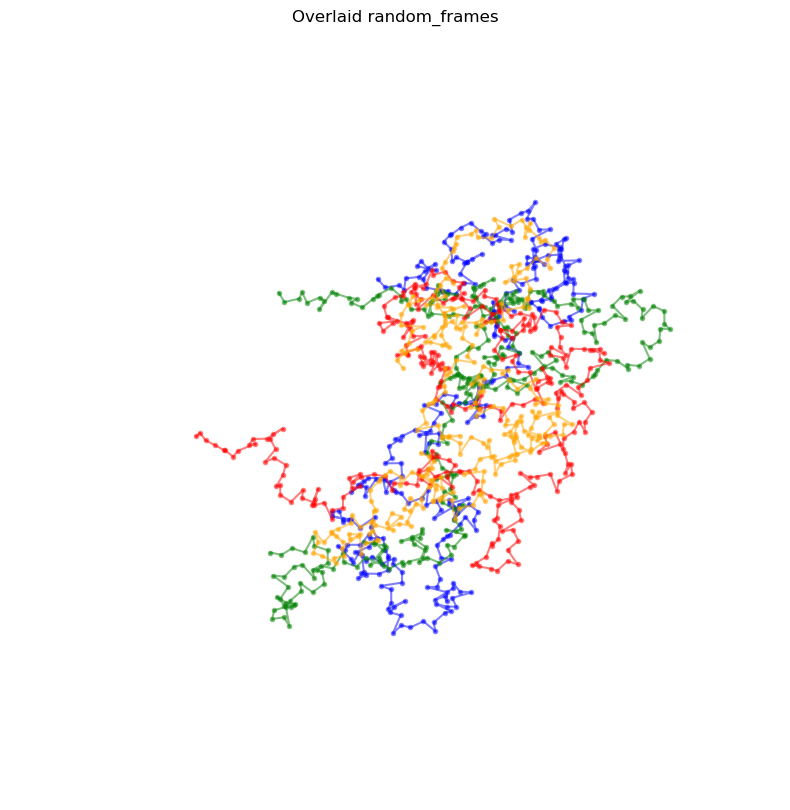

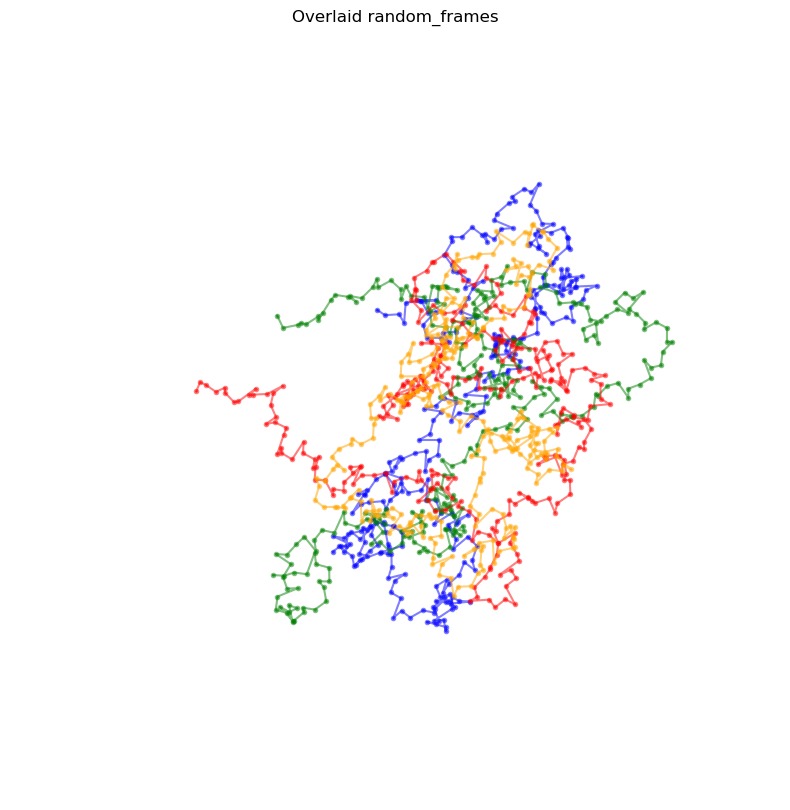

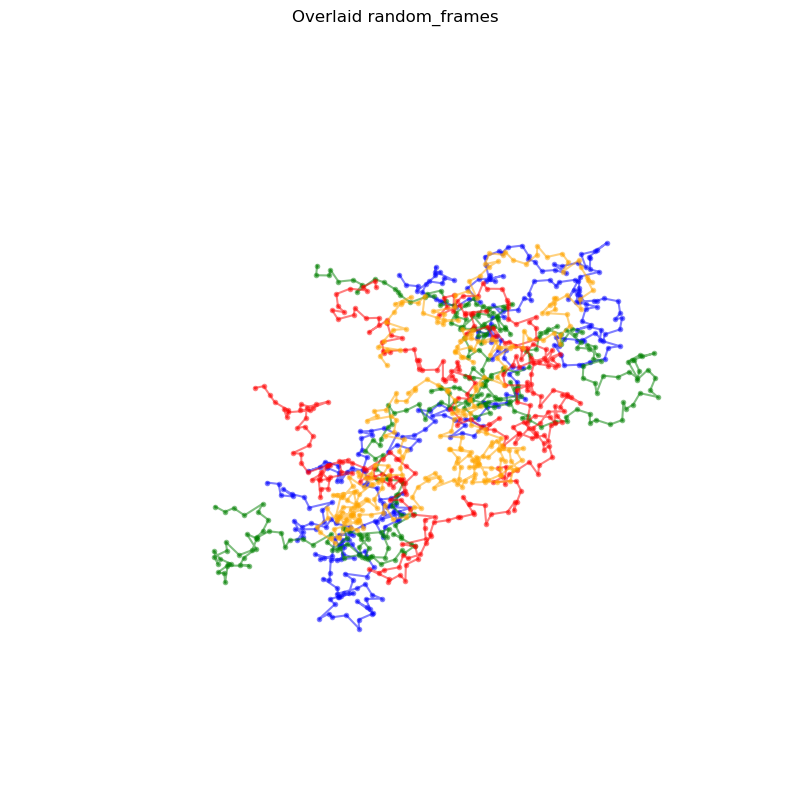

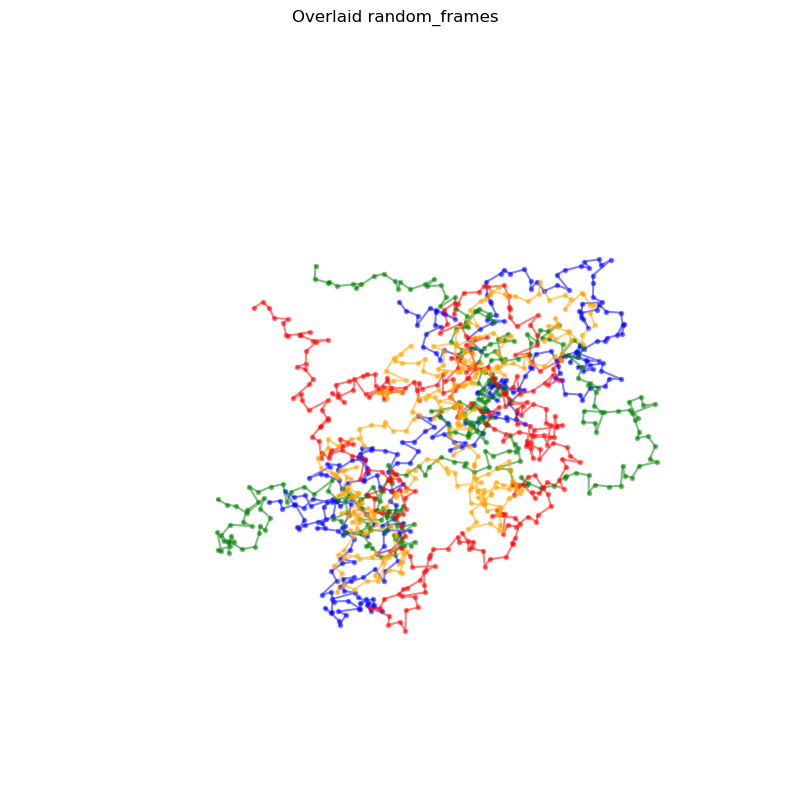

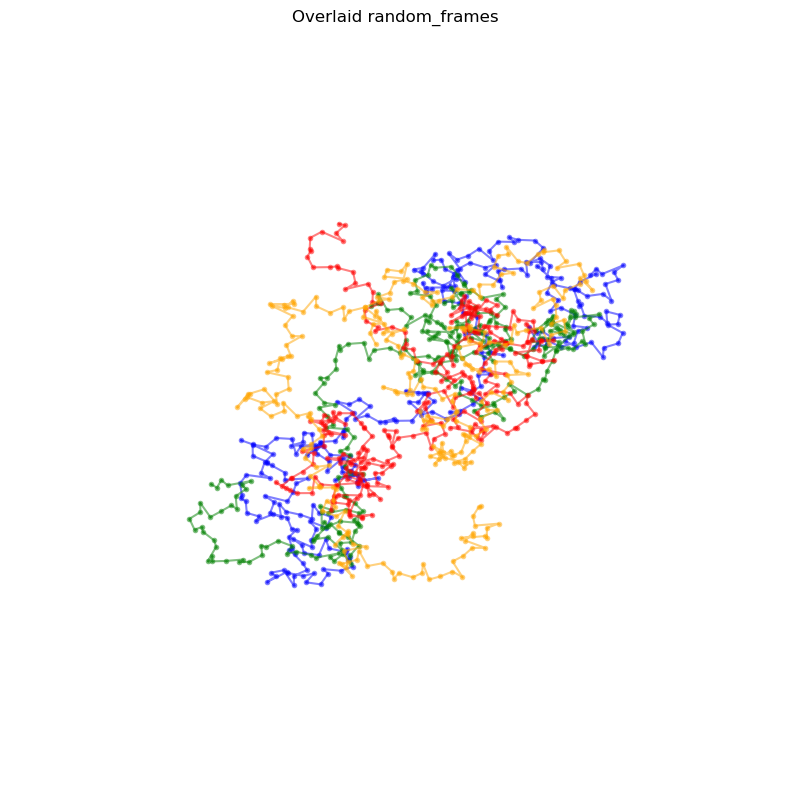

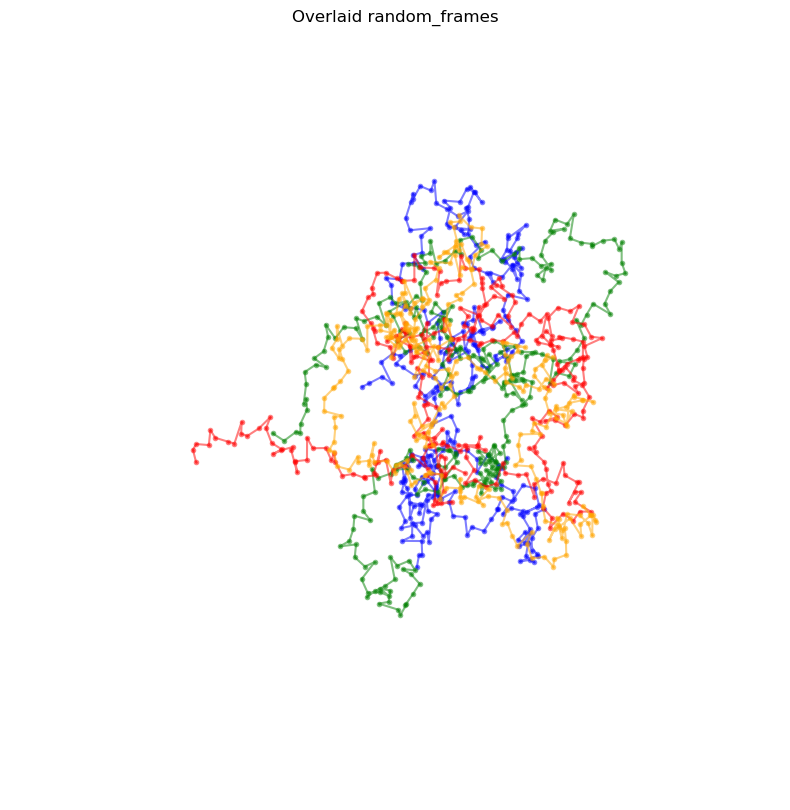

In [23]:
indices = random_frames
title = 'random_frames'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'orange', 'black', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
        opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  
    ax.grid(False)     
    plt.title(f'Overlaid {title}')
    plt.show()

Aligning frames: 100%|██████████████████████████| 15/15 [00:00<00:00, 46.59it/s]


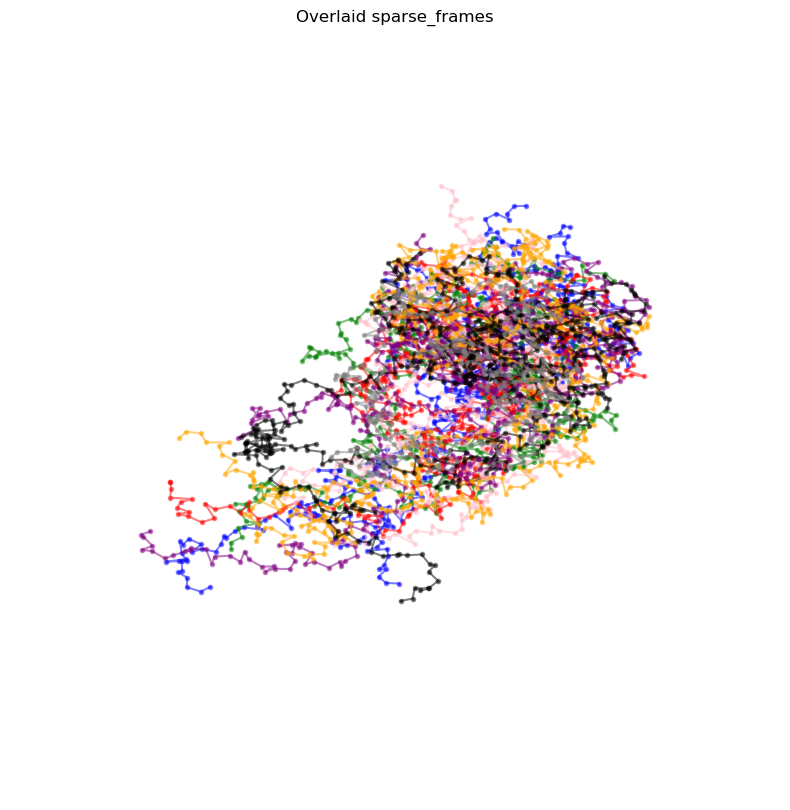

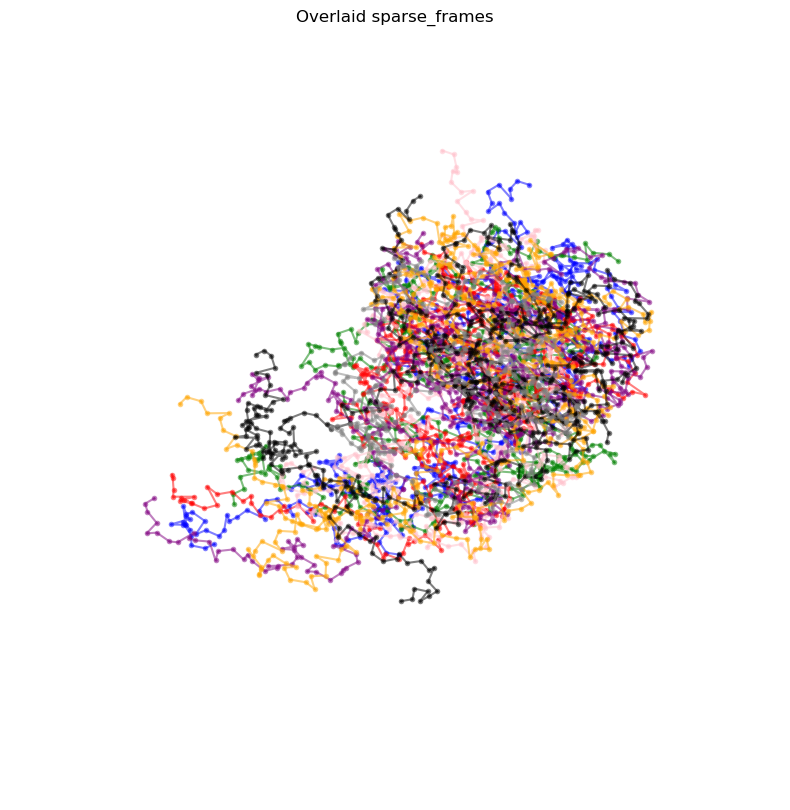

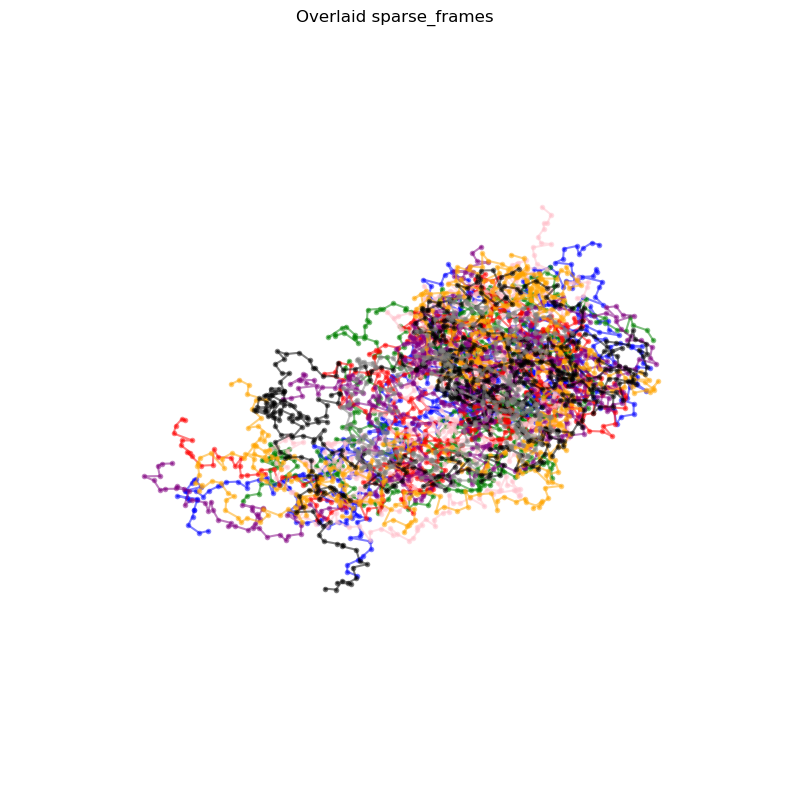

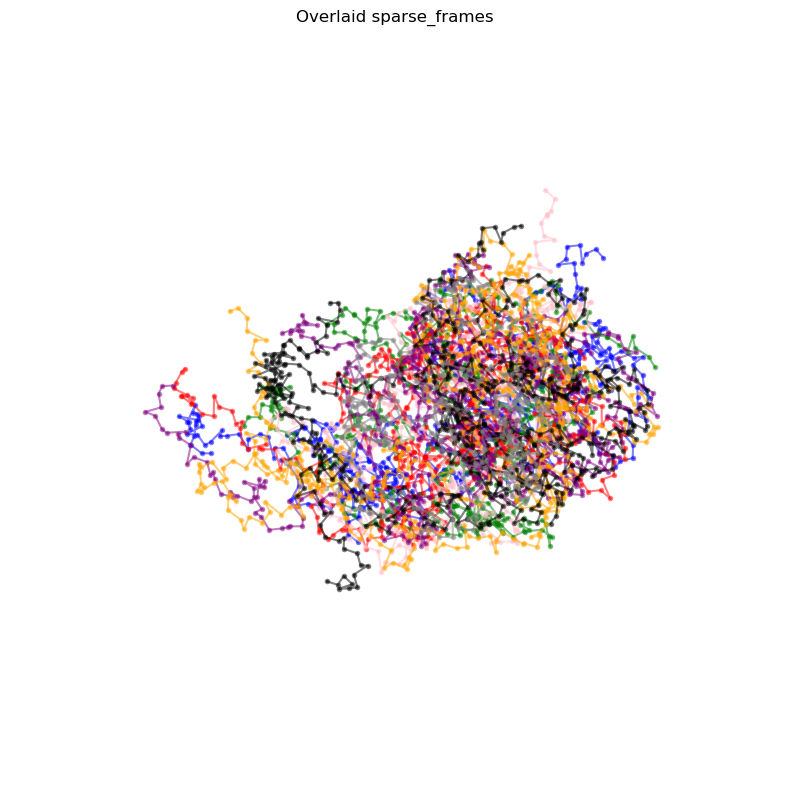

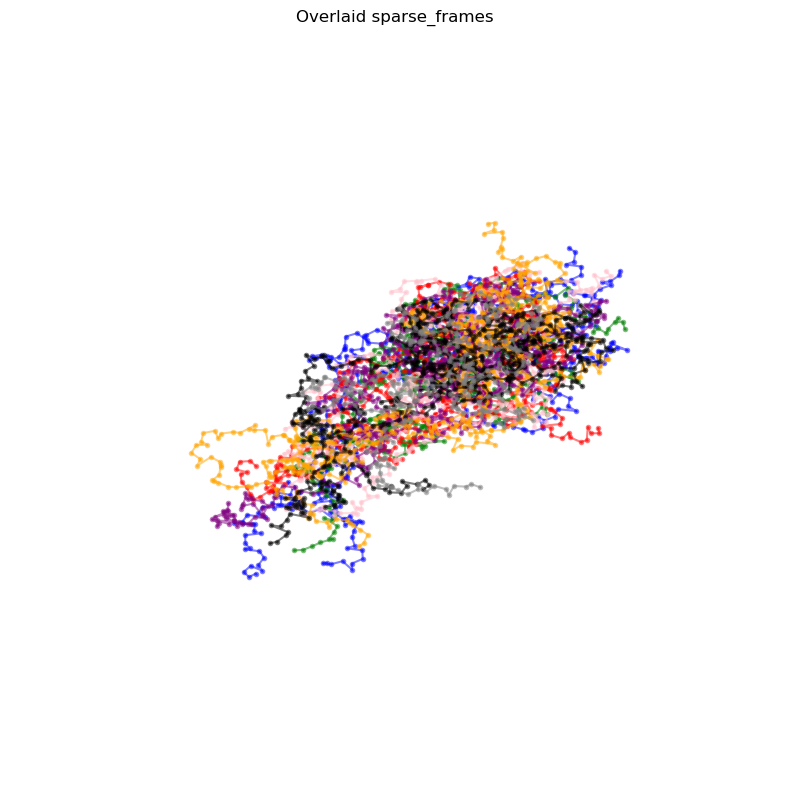

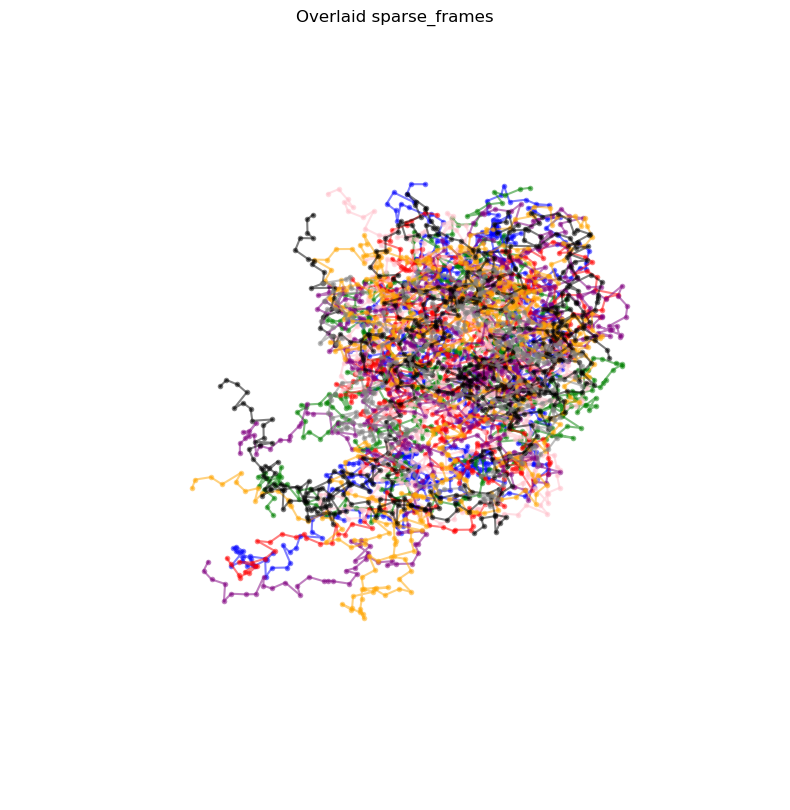

In [24]:
indices = sparse_frames
title = 'sparse_frames'

def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(indices, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'blue', 'green', 'green', 'red', 'red', 'pink', 'pink', 'purple', 'purple', 'orange', 'orange', 'black', 'black', 'grey', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
        opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Overlaid {title}')
    plt.show()

Aligning frames: 100%|██████████████████████████| 10/10 [00:00<00:00, 44.39it/s]


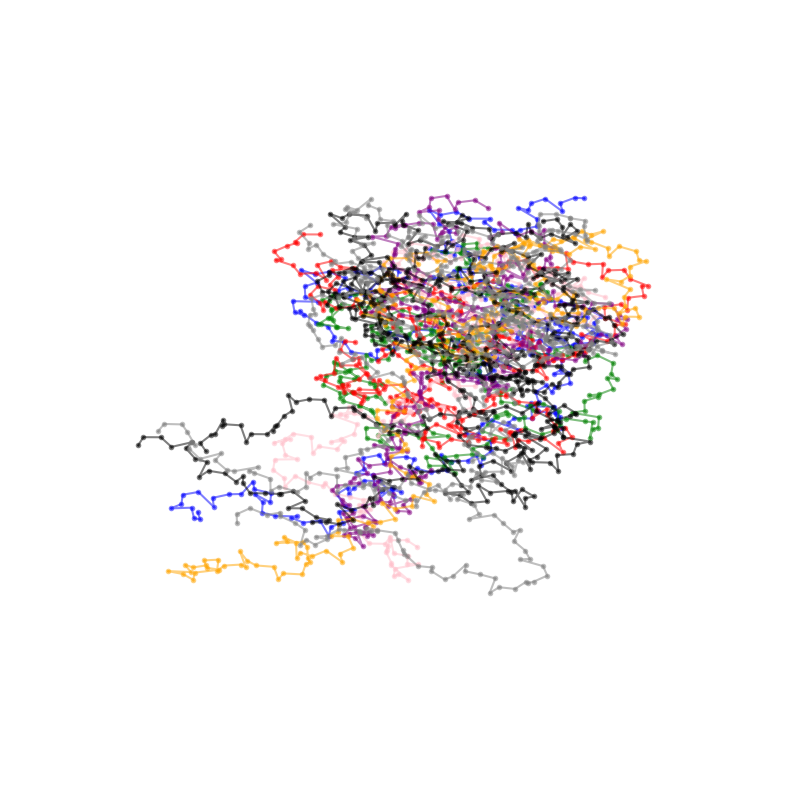

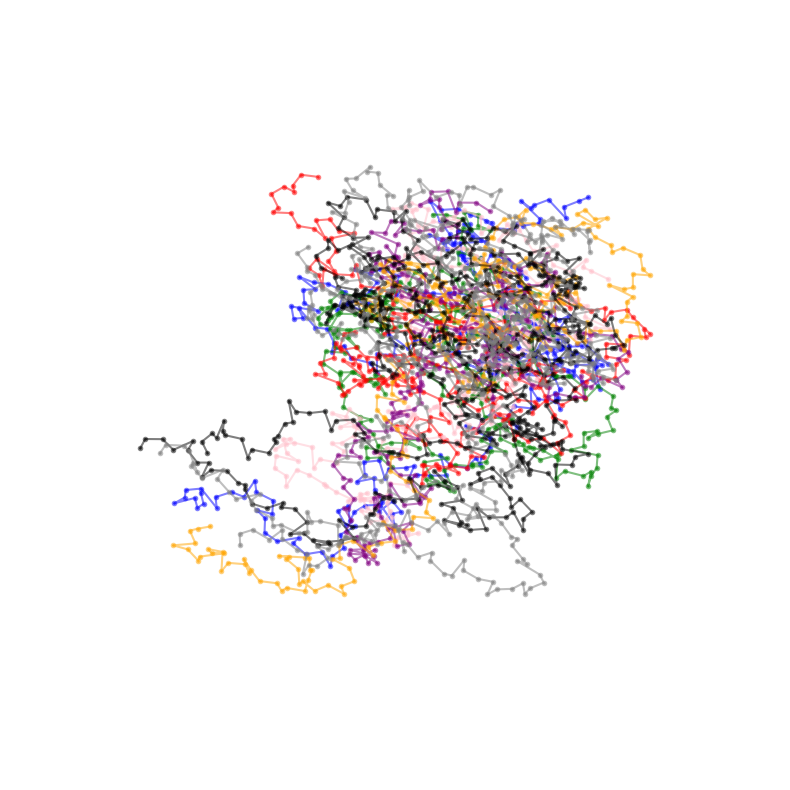

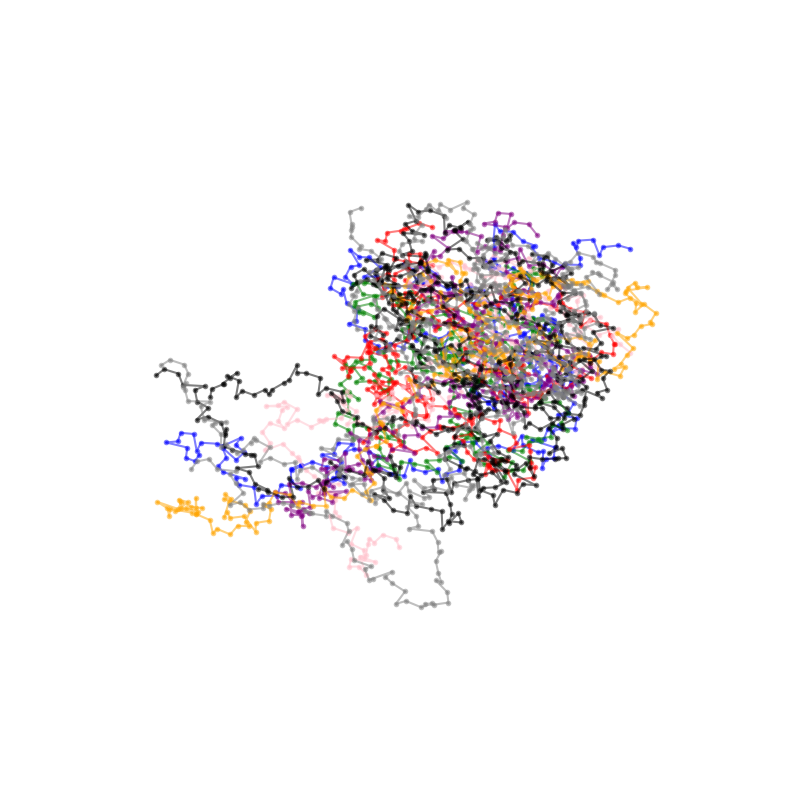

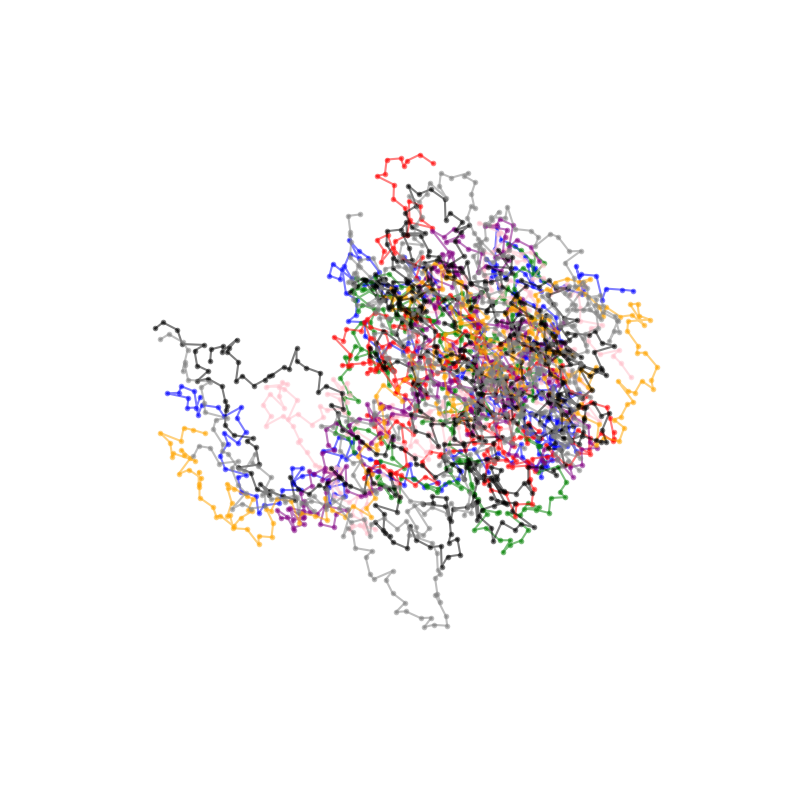

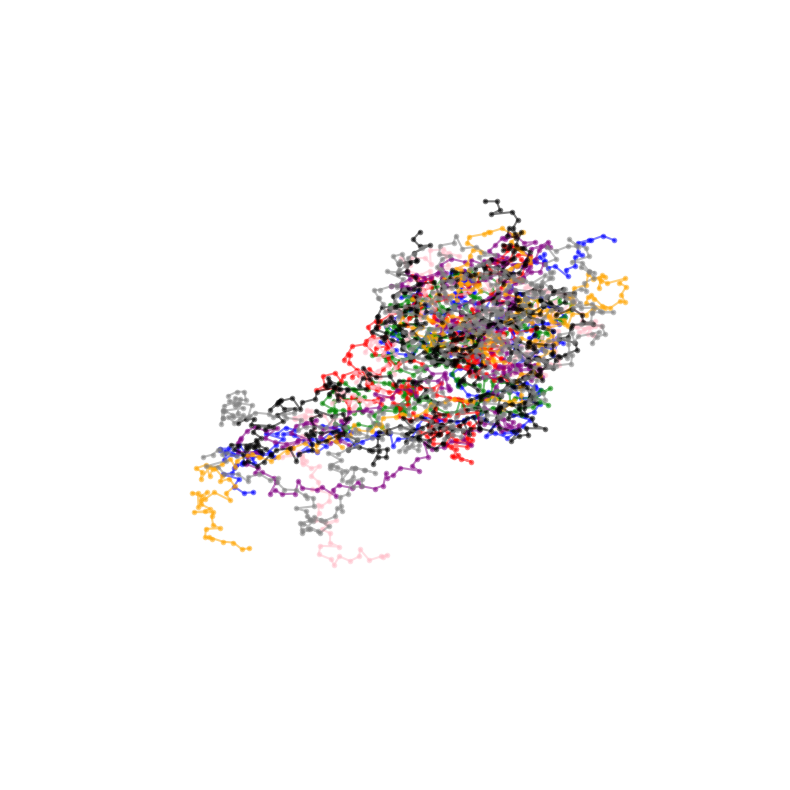

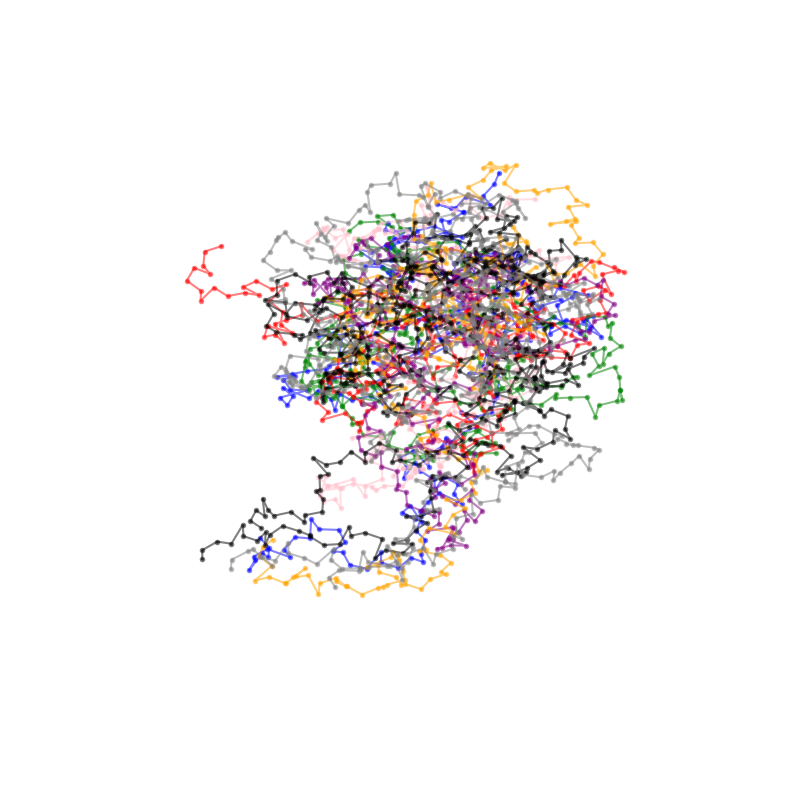

In [12]:
def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(sparser_frames, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index = -1
max_cumulative_overlap = -1

for i, frame in enumerate(frames_cluster_s):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_s)
    if cumulative_overlap > max_cumulative_overlap:
        max_cumulative_overlap = cumulative_overlap
        best_reference_index = i

reference_universe = create_temp_universe(frames_cluster_s[best_reference_index], u)

aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

cumulative_overlap = {}

for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

colors = ['blue', 'green', 'red', 'pink', 'purple', 'orange', 'black', 'black', 'grey', 'grey']
assert len(colors) >= len(aligned_frames_cluster_s), "Not enough colors for each frame!"

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = colors[i % len(colors)]  # Ensure cyclic usage if more frames than colors
        opacity = 0.5 * np.max([cumulative_overlap[tuple(pos)] for pos in positions]) if positions.size > 0 else 0.01
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.show()

# 2 Colour Light & Dark

Aligning frames: 100%|████████████████████████████| 4/4 [00:00<00:00, 42.76it/s]


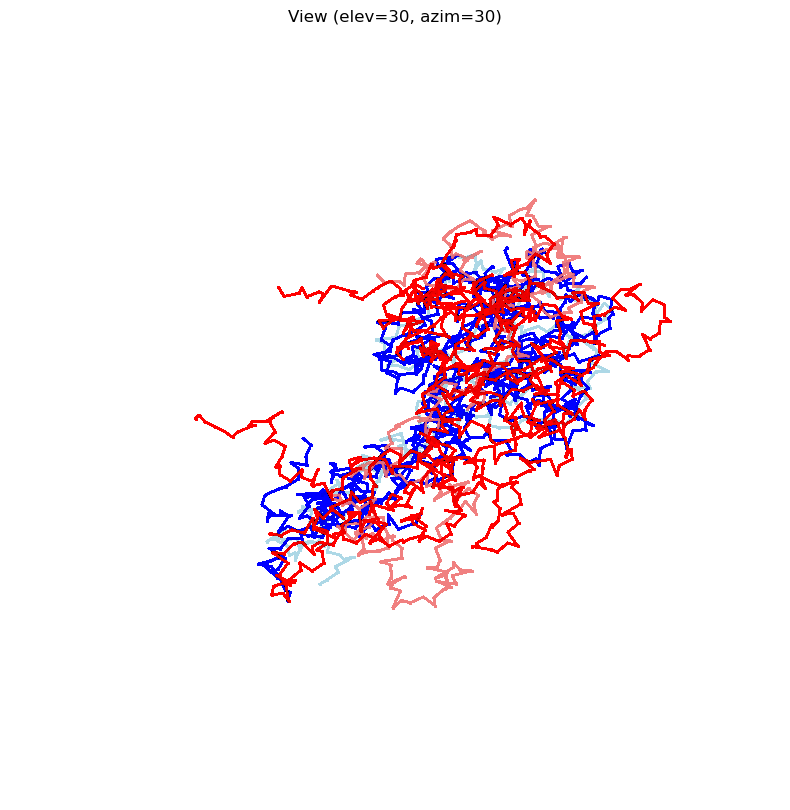

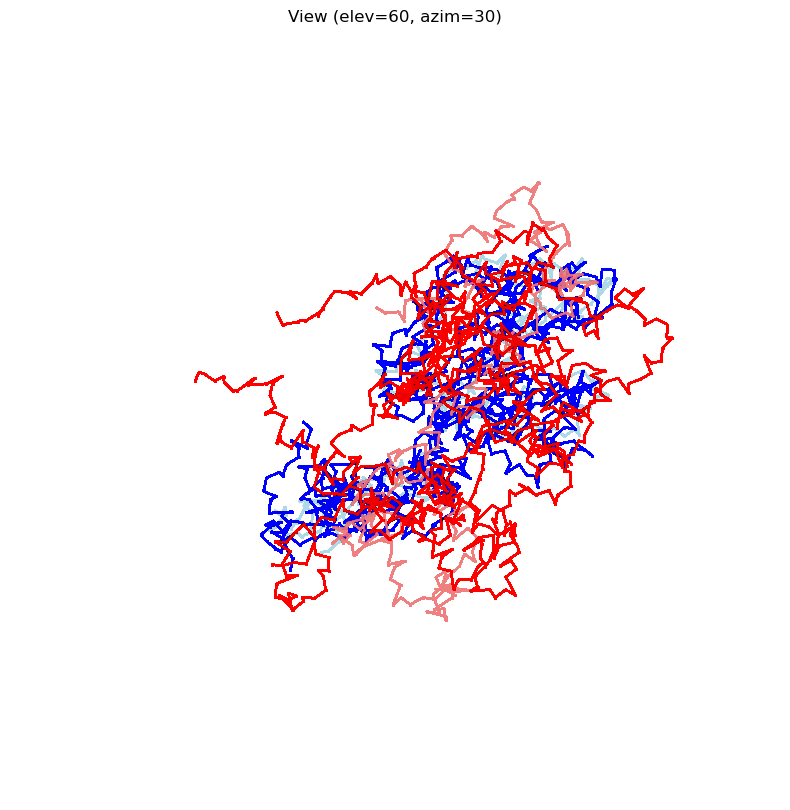

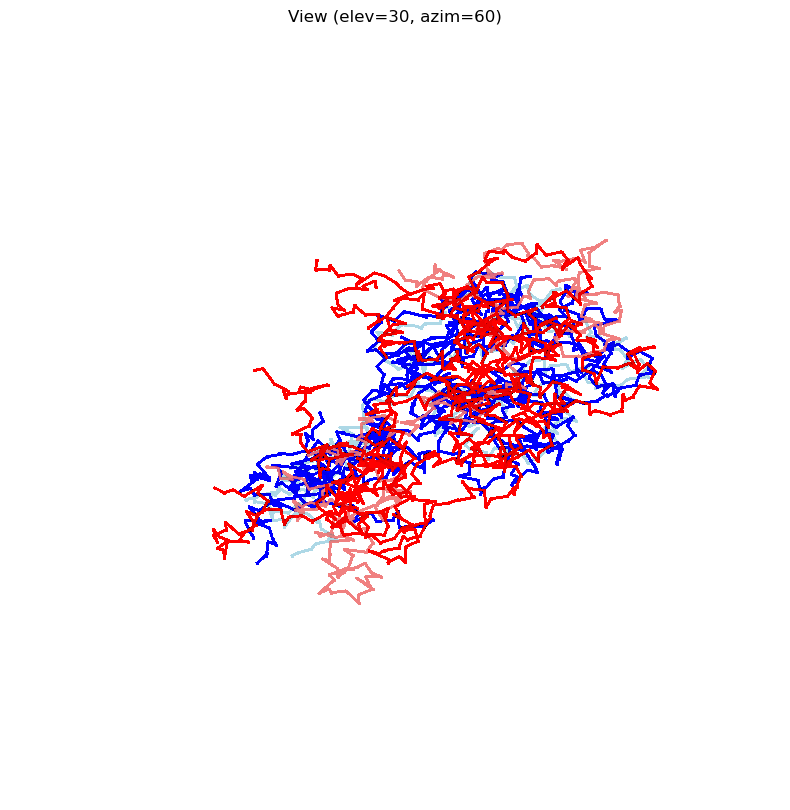

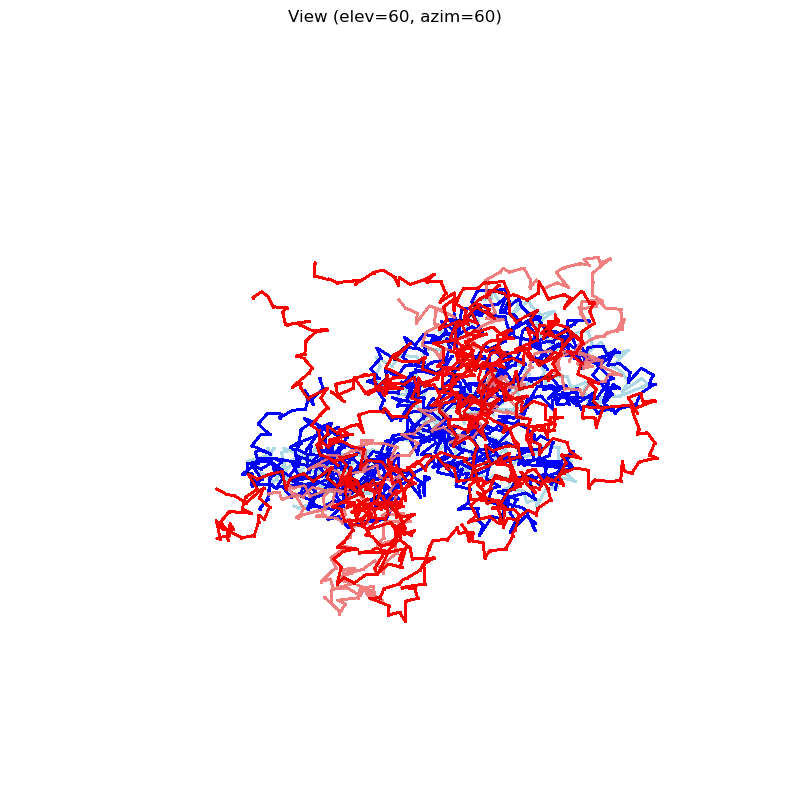

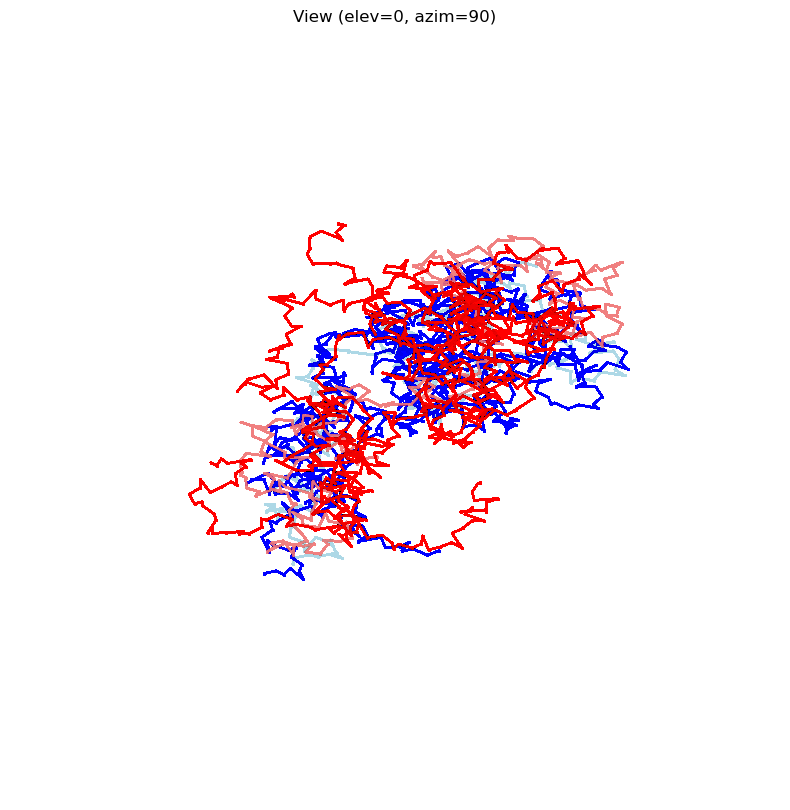

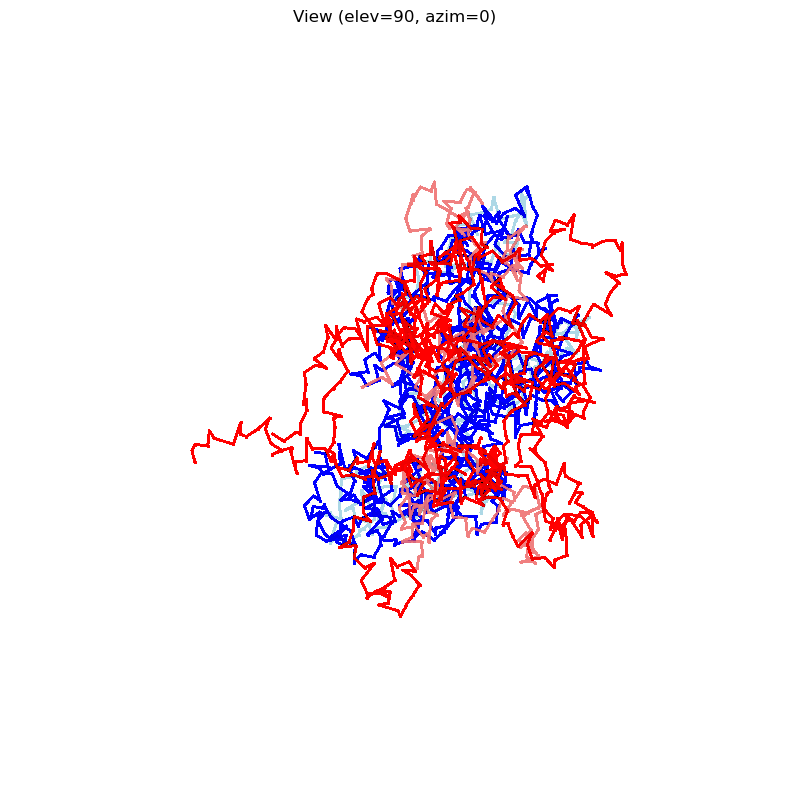

In [13]:
def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 4 and cluster 5
frames_cluster_4 = extract_frames(best_frames, u)
frames_cluster_5 = extract_frames(random_frames, u)

def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

select_all_backbone = "backbone"

def calculate_overlap_counts(frames):
    overlap_counts = []
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        overlap_counts.append((unique, counts_frame))
    return overlap_counts

def calculate_cumulative_overlap(reference_frame, frames):
    cumulative_overlap = 0
    ref_unique, ref_counts = np.unique(reference_frame, axis=0, return_counts=True)
    ref_counts_dict = {tuple(pos): count for pos, count in zip(ref_unique, ref_counts)}
    for frame in frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        for pos, count in zip(unique, counts_frame):
            pos_tuple = tuple(pos)
            if pos_tuple in ref_counts_dict:
                cumulative_overlap += min(ref_counts_dict[pos_tuple], count)
    return cumulative_overlap

best_reference_index_4 = -1
max_cumulative_overlap_4 = -1

for i, frame in enumerate(frames_cluster_4):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_4)
    if cumulative_overlap > max_cumulative_overlap_4:
        max_cumulative_overlap_4 = cumulative_overlap
        best_reference_index_4 = i

best_reference_index_5 = -1
max_cumulative_overlap_5 = -1

for i, frame in enumerate(frames_cluster_5):
    cumulative_overlap = calculate_cumulative_overlap(frame, frames_cluster_5)
    if cumulative_overlap > max_cumulative_overlap_5:
        max_cumulative_overlap_5 = cumulative_overlap
        best_reference_index_5 = i

reference_universe_4 = create_temp_universe(frames_cluster_4[best_reference_index_4], u)
reference_universe_5 = create_temp_universe(frames_cluster_5[best_reference_index_5], u)

aligned_frames_cluster_4 = align_frames(reference_universe_4, frames_cluster_4, select_all_backbone)
aligned_frames_cluster_5 = align_frames(reference_universe_5, frames_cluster_5, select_all_backbone)

angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

overlap_counts_4 = calculate_overlap_counts(aligned_frames_cluster_4)
overlap_counts_5 = calculate_overlap_counts(aligned_frames_cluster_5)

cumulative_overlap_4 = {}
cumulative_overlap_5 = {}

for unique, counts_frame in overlap_counts_4:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap_4:
            cumulative_overlap_4[pos_tuple] += count
        else:
            cumulative_overlap_4[pos_tuple] = count

for unique, counts_frame in overlap_counts_5:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap_5:
            cumulative_overlap_5[pos_tuple] += count
        else:
            cumulative_overlap_5[pos_tuple] = count

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 4 frames
    for i, positions in enumerate(aligned_frames_cluster_4):
        if i == 0:
            color = 'lightblue'
        elif i == 1:
            color = 'blue'
        else:
            color = 'blue'
        for j in range(len(positions)):
            pos_tuple = tuple(positions[j])
            opacity = 0.05 * cumulative_overlap_4[pos_tuple] if pos_tuple in cumulative_overlap_4 else 0.01
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=1, markeredgewidth=0.8, alpha=0.05)
    
    # Plot cluster 5 frames
    for i, positions in enumerate(aligned_frames_cluster_5):
        if i == 0:
            color = 'lightcoral'
        elif i == 1:
            color = 'red'
        else:
            color = 'red'
        for j in range(len(positions)):
            pos_tuple = tuple(positions[j])
            opacity = 0.05 * cumulative_overlap_5[pos_tuple] if pos_tuple in cumulative_overlap_5 else 0.01
            ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=1, markeredgewidth=0.8, alpha=0.05)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'View (elev={angle[0]}, azim={angle[1]})')
    plt.show()

Aligning frames: 100%|████████████████████████████| 4/4 [00:00<00:00, 37.02it/s]


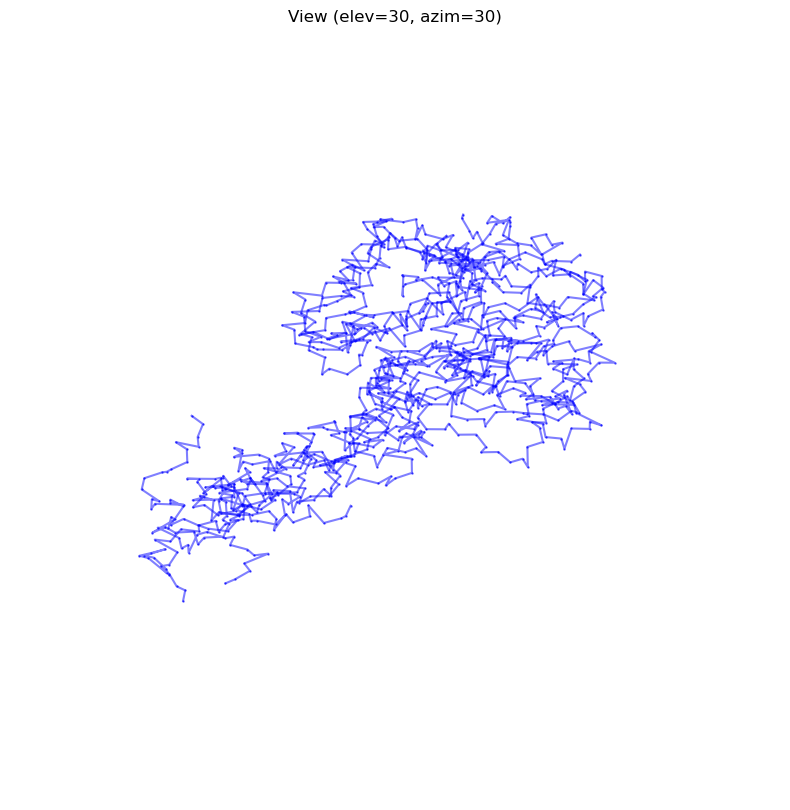

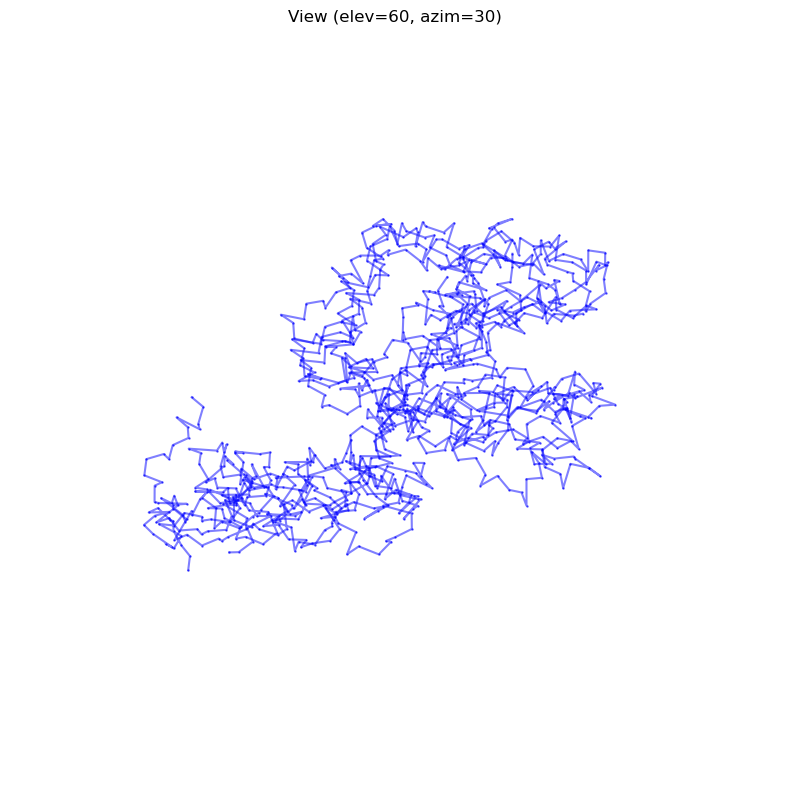

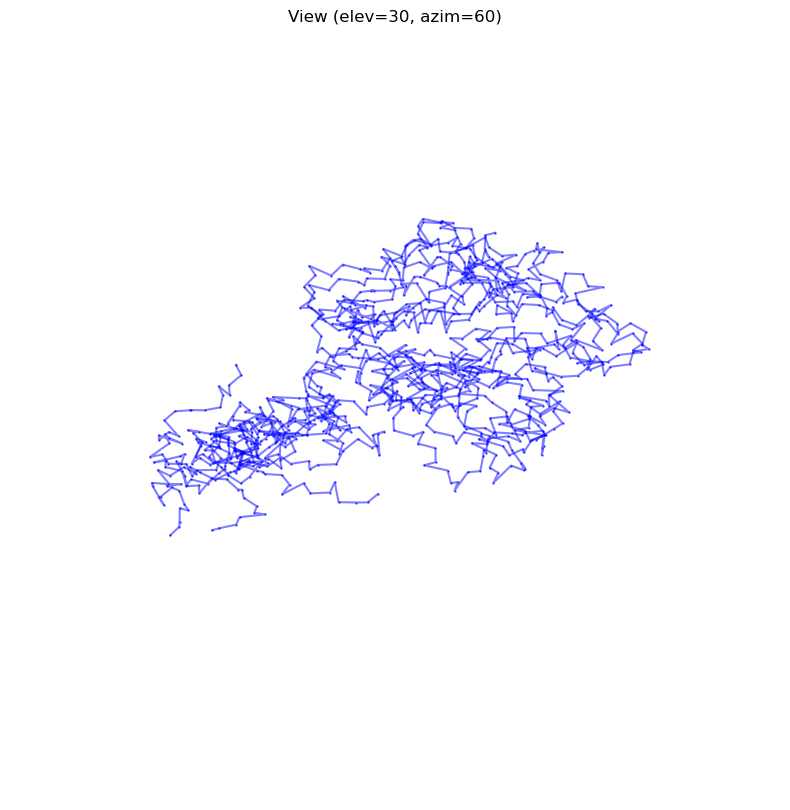

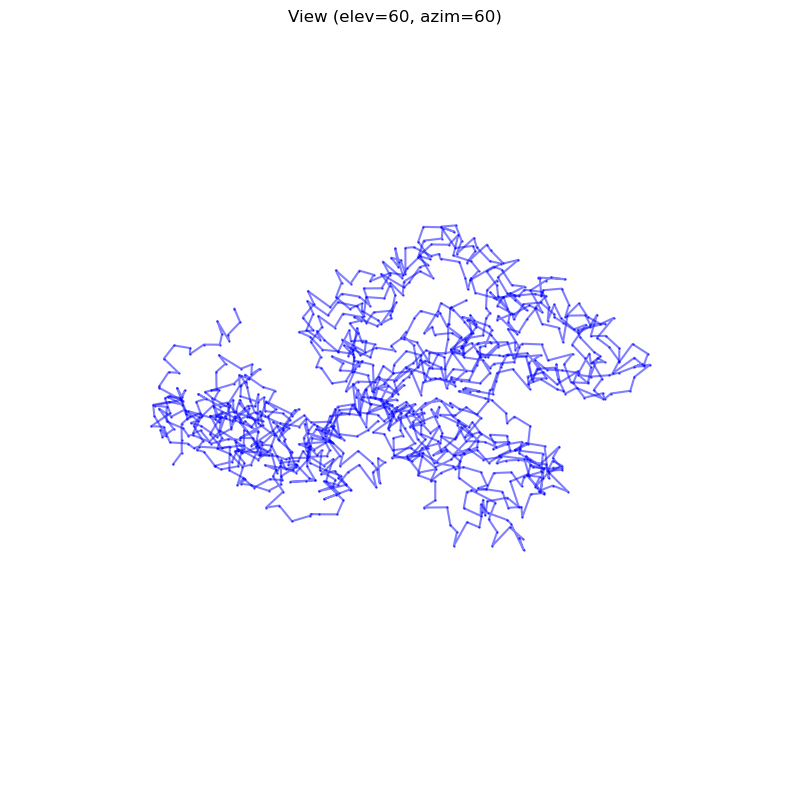

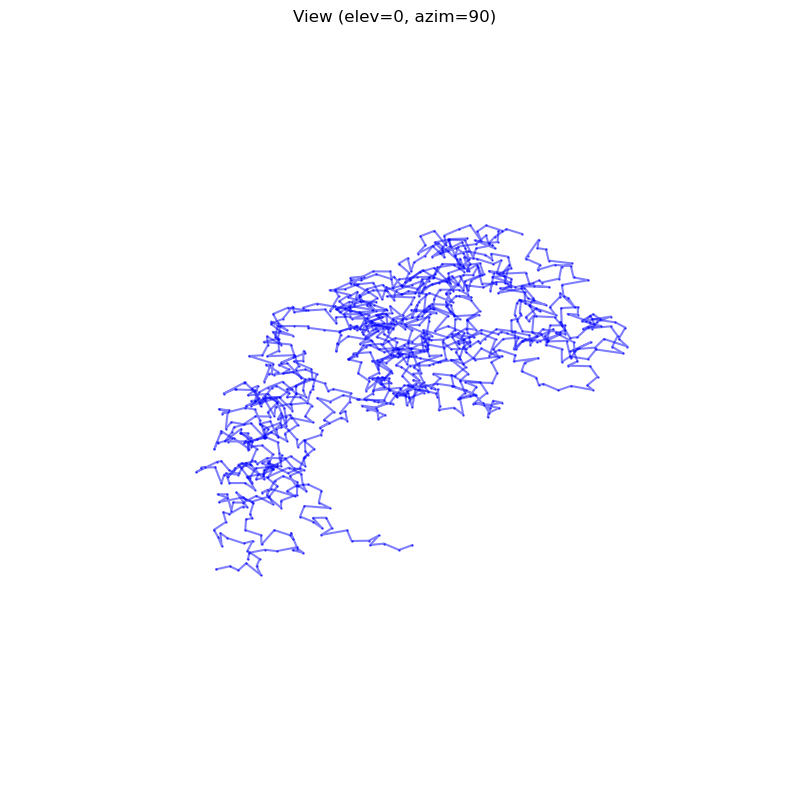

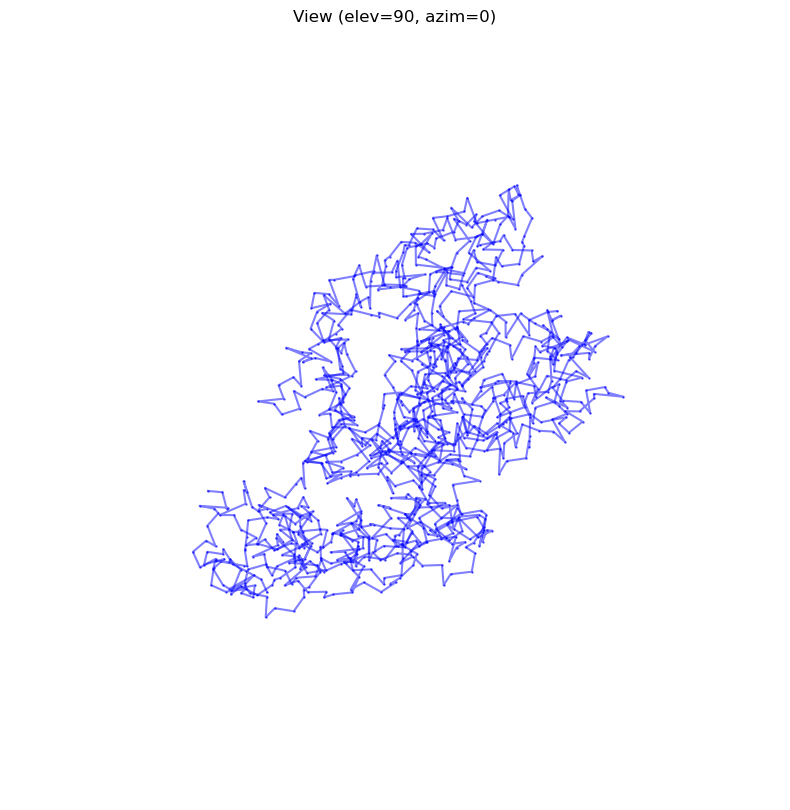

In [14]:
def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_8 = extract_frames(best_frames, u)

# Create temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for all backbone residues to ensure alignment of corresponding residues
select_all_backbone = "backbone"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_8[0], u)

# Align frames for cluster 8
aligned_frames_cluster_8 = align_frames(reference_universe, frames_cluster_8, select_all_backbone)

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for positions in aligned_frames_cluster_8:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=0.5)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'View (elev={angle[0]}, azim={angle[1]})')
    plt.show()

## 1 Red, Rest Blue

In [15]:
best_frames_and_rand = [18271, 18275, 18267, 18447, 27834]

Aligning frames: 100%|████████████████████████████| 5/5 [00:00<00:00, 43.64it/s]


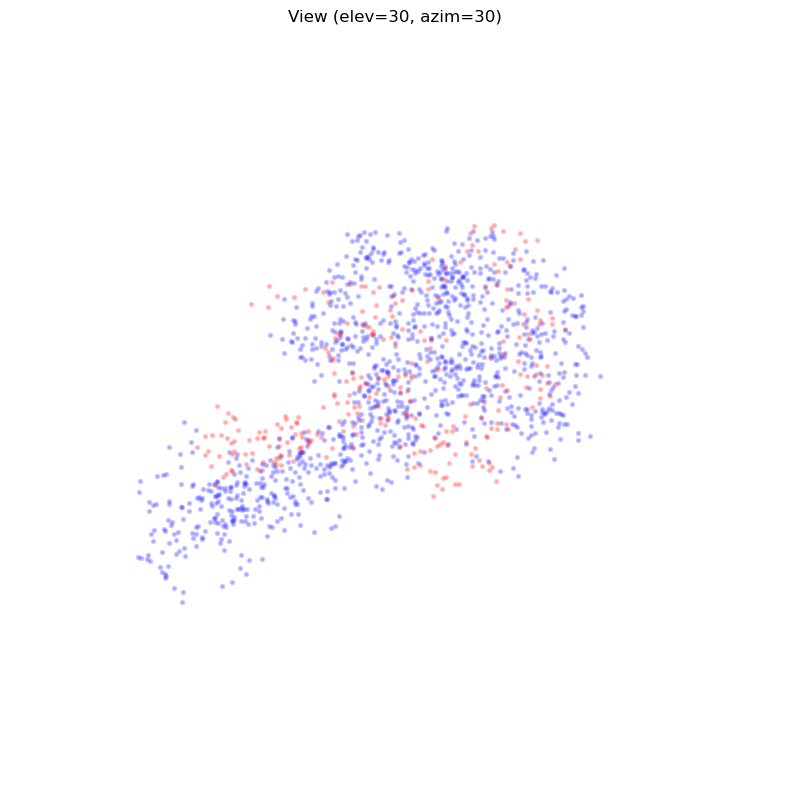

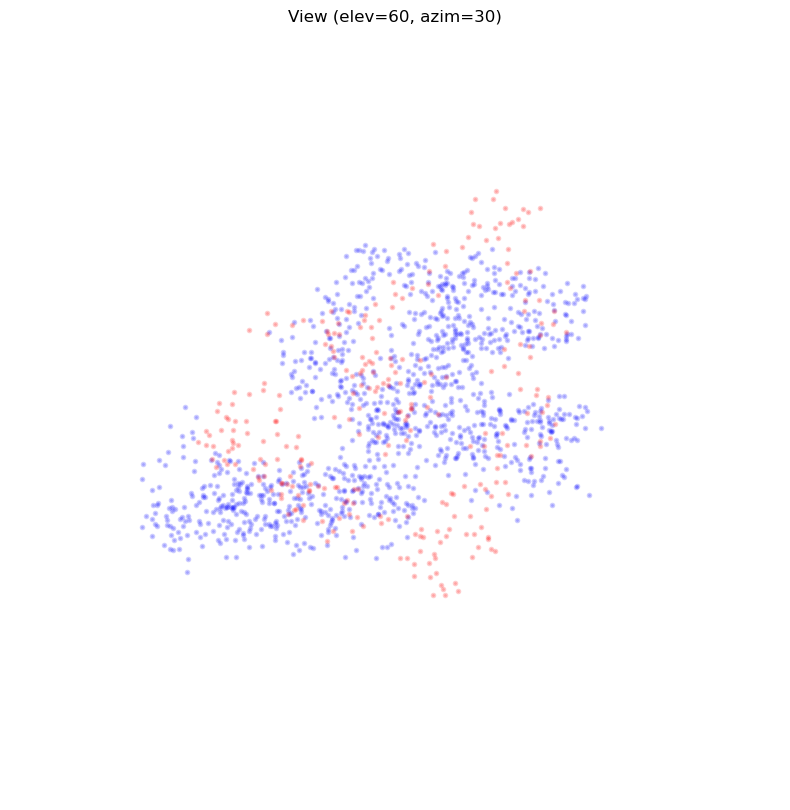

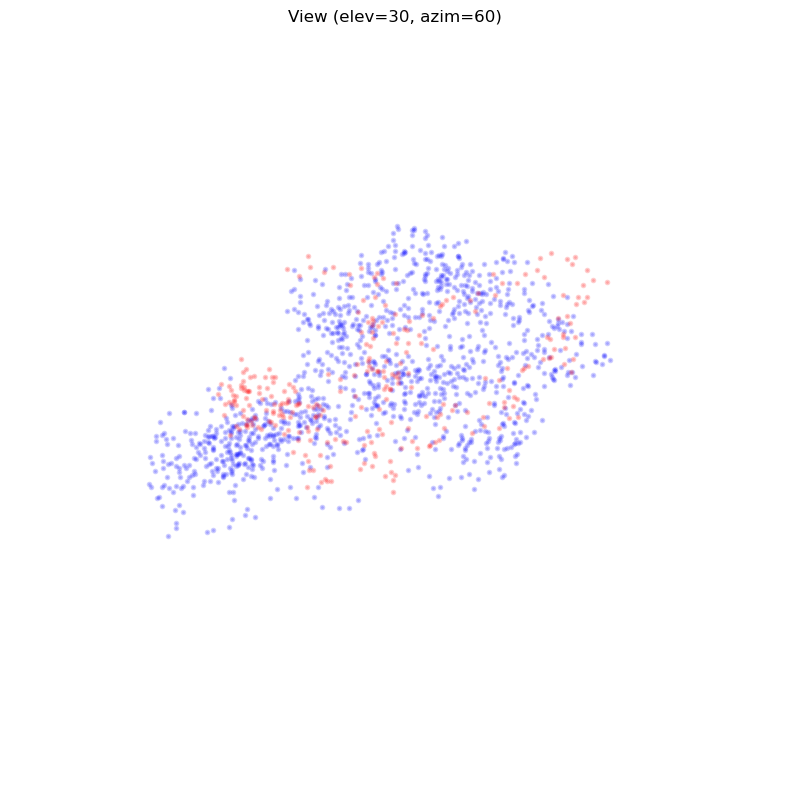

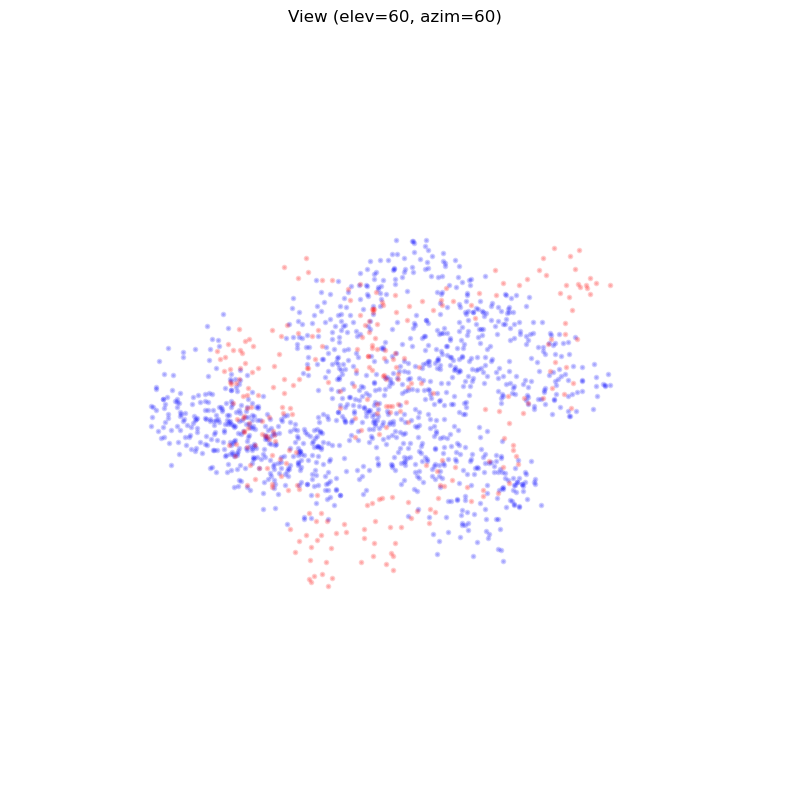

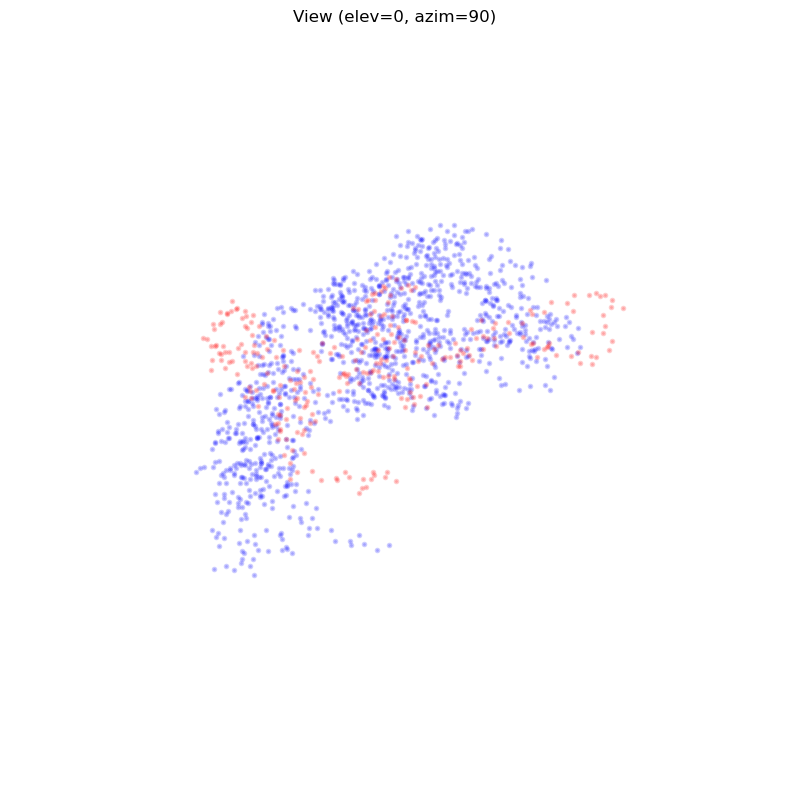

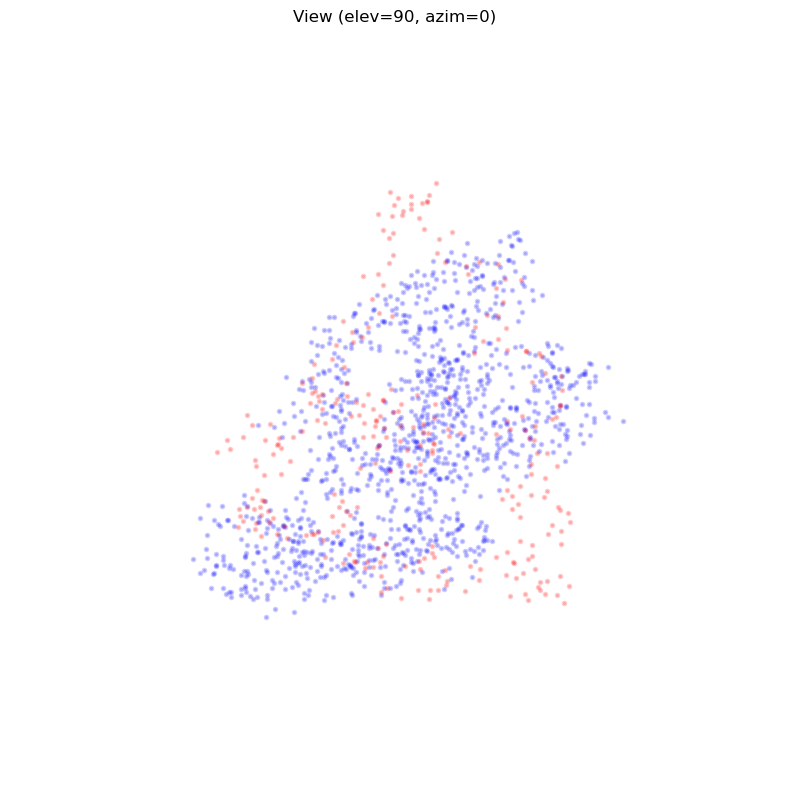

In [16]:
def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 8
frames_cluster_s = extract_frames(best_frames_and_rand, u)

# Create temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for all backbone residues to ensure alignment of corresponding residues
select_all_backbone = "backbone"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_s[0], u)

# Align frames for cluster 8
aligned_frames_cluster_s = align_frames(reference_universe, frames_cluster_s, select_all_backbone)

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

# Function to calculate and store overlap counts
def calculate_overlap_counts(aligned_frames):
    counts = []
    for frame in aligned_frames:
        unique, counts_frame = np.unique(frame, axis=0, return_counts=True)
        counts.append((unique, counts_frame))
    return counts

# Calculate overlap counts for each aligned frame
overlap_counts = calculate_overlap_counts(aligned_frames_cluster_s)

# Dictionary to hold the cumulative overlap for each unique position across all frames
cumulative_overlap = {}

# Update cumulative overlap counts
for unique, counts_frame in overlap_counts:
    for pos, count in zip(unique, counts_frame):
        pos_tuple = tuple(pos)
        if pos_tuple in cumulative_overlap:
            cumulative_overlap[pos_tuple] += count
        else:
            cumulative_overlap[pos_tuple] = count

# Select a random frame to plot in red
random_frame_index = np.random.randint(len(aligned_frames_cluster_s))

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 8 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_s):
        color = 'red' if i == 4 else 'blue'
        for j in range(len(positions)):
            pos_tuple = tuple(positions[j])
            opacity = 0.5 * cumulative_overlap[pos_tuple] if pos_tuple in cumulative_overlap else 0.01
            ax.plot([positions[j, 0]], [positions[j, 1]], [positions[j, 2]], 'o-', color=color, markersize=2, markeredgewidth=2, alpha=0.2)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'View (elev={angle[0]}, azim={angle[1]})')
    plt.show()

Aligning frames: 100%|████████████████████████████| 5/5 [00:00<00:00, 30.21it/s]


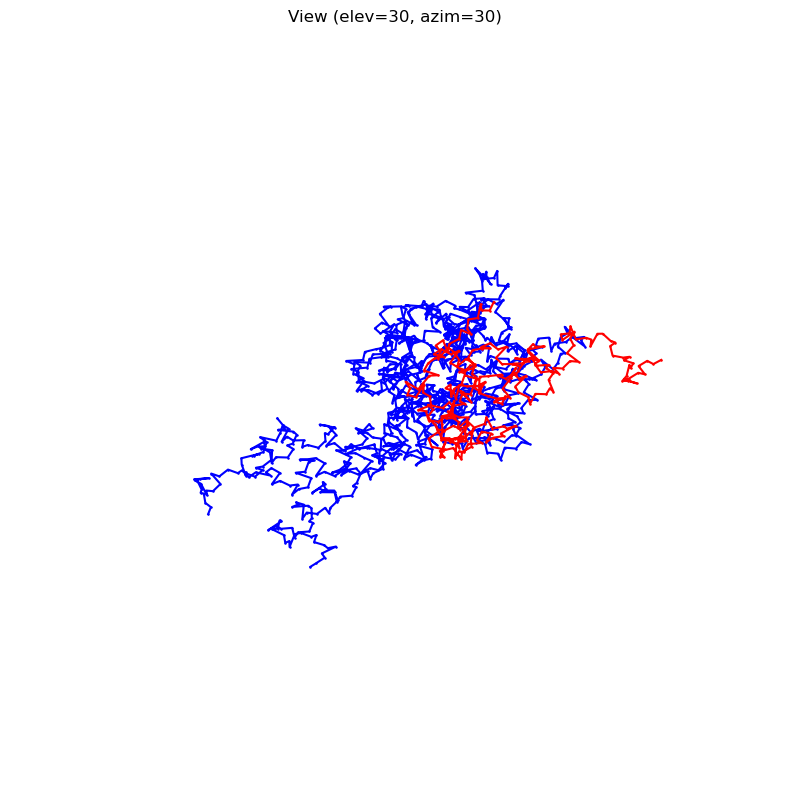

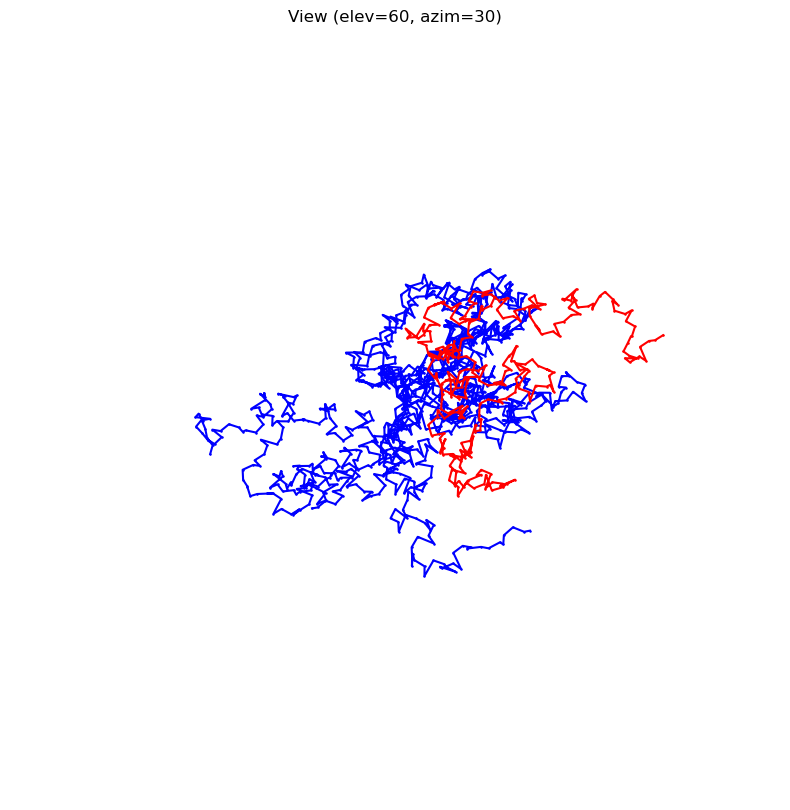

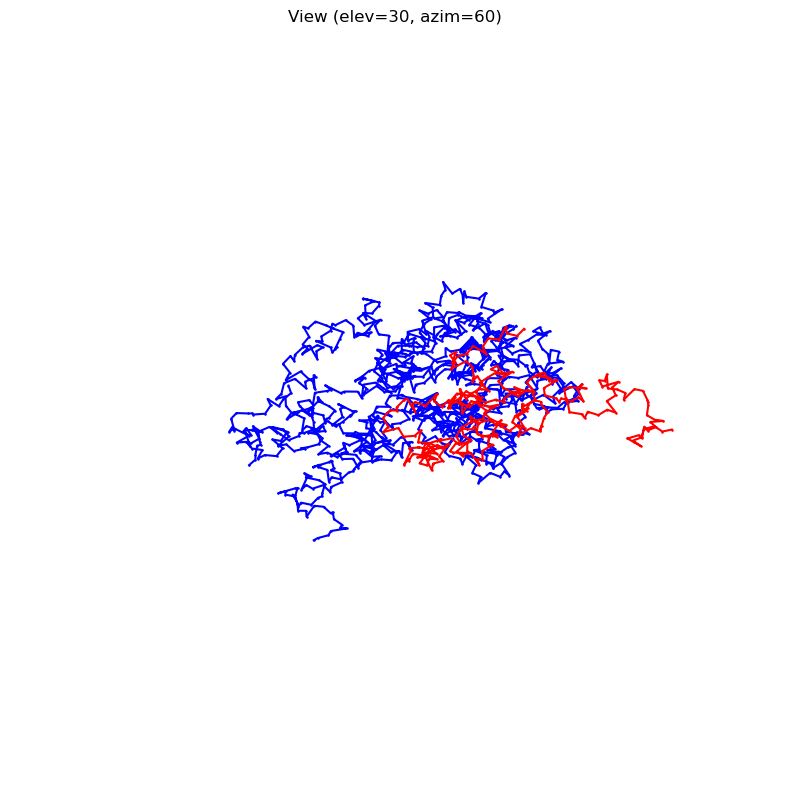

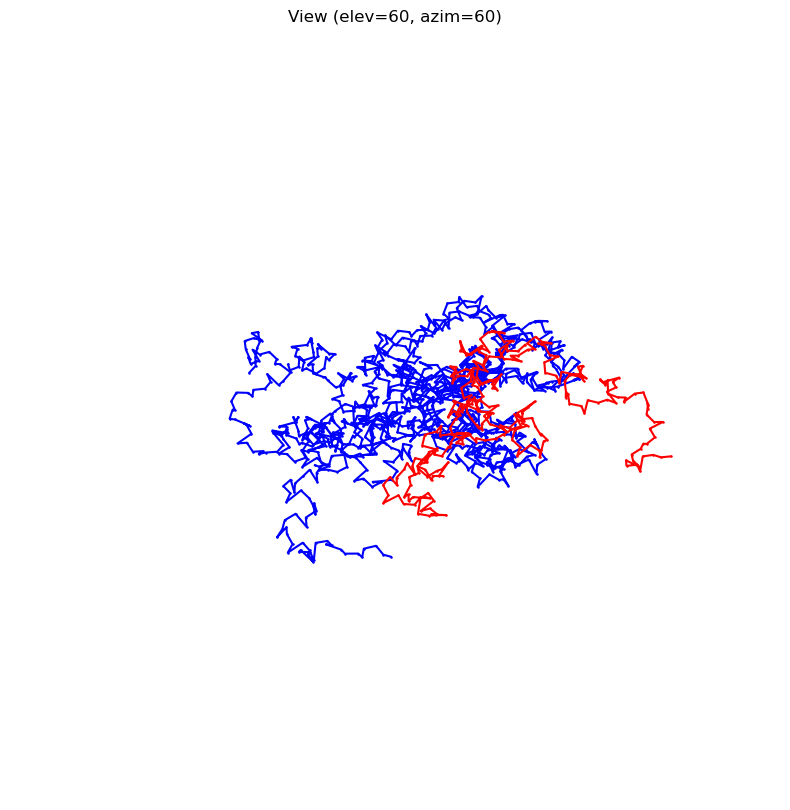

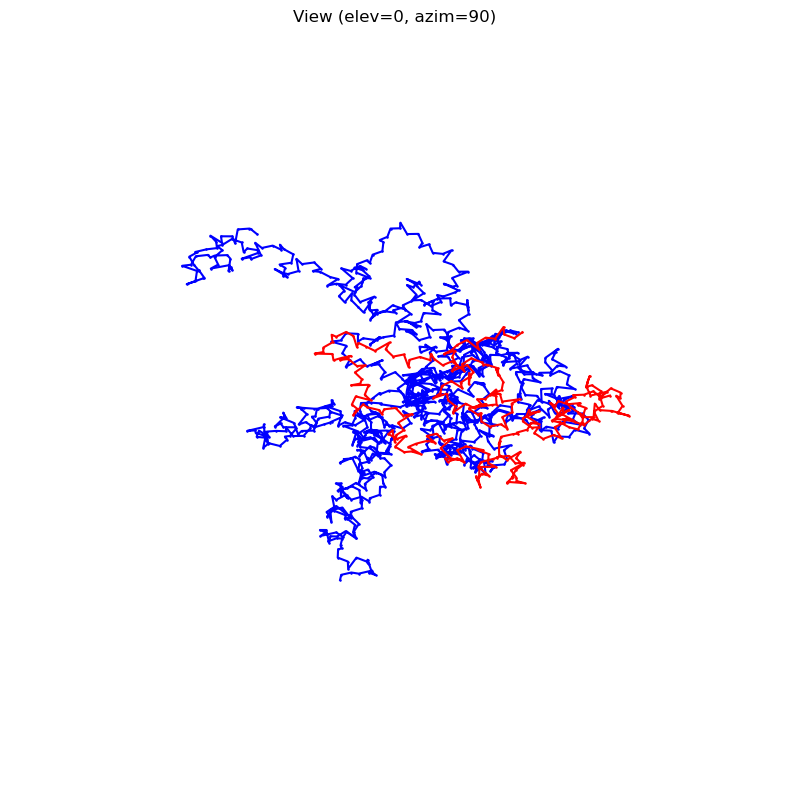

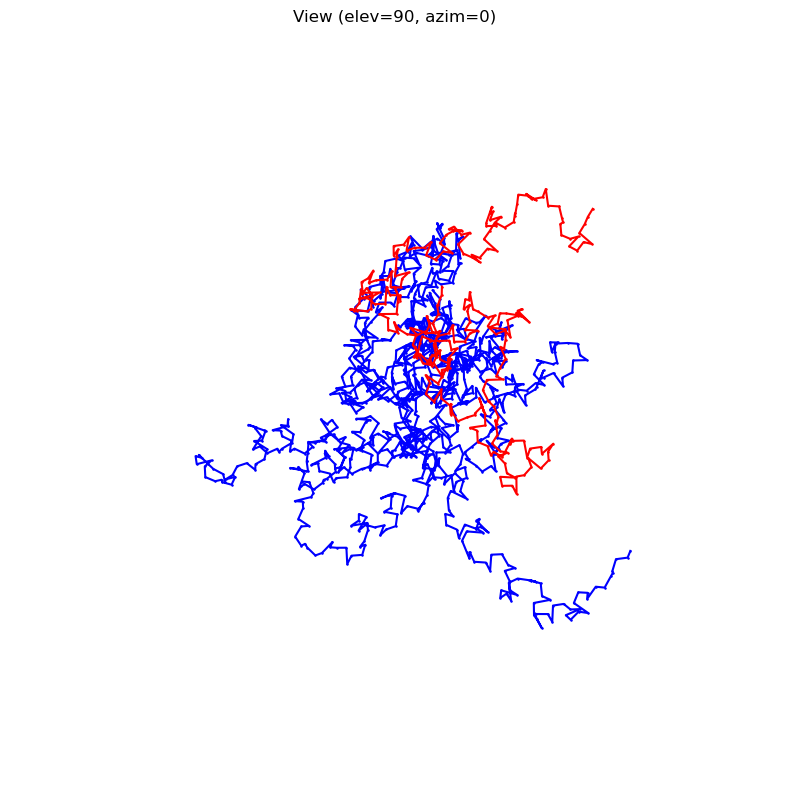

In [17]:
def extract_frames(indices, universe):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        universe.trajectory[idx]
        frames.append(universe.select_atoms("backbone").positions.copy())
    return frames

# Extract frames for cluster 2
frames_cluster_8 = extract_frames(best_frames_and_rand, u)

# Create temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("backbone"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for the first 3 residues
select_first_3_residues = "resid 1:3 and backbone"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_8[0], u)

# Align frames for cluster 2
aligned_frames_cluster_8 = align_frames(reference_universe, frames_cluster_8, select_first_3_residues)

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 2 frames with lines
    for i, positions in enumerate(aligned_frames_cluster_8):
        color = 'red' if i == 4 else 'blue'
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color=color, markersize=1, markeredgewidth=0.8, alpha=1)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'View (elev={angle[0]}, azim={angle[1]})')
    plt.show()